# Data Preparation

In [25]:
%matplotlib inline 
# Make plots appear inside the notebook

# EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# Change plots style
plt.style.use('seaborn-v0_8')
plt.rcParams["font.size"] = 50
plt.rcParams["xtick.labelsize"] = 10

In [26]:
def visualize_distribution(df, column, label, logscale=False):
    """
    Plot the distribution of a spicific column in a dataframe
    """
    # Subplot of distribution
    fig, (ax0, ax1) = plt.subplots(nrows=2,
                                    ncols=1,
                                    figsize=(35, 30),
                                    sharex=False)

    # Add data to ax0
    red_square = dict(markerfacecolor="lightblue", marker="s")
    ax0.boxplot(df[column], vert=False, flierprops=red_square);
    # Add data to ax1
    ax1.hist(df[column], bins=6);

    # Customize ax0
    ax0.set_title(label="Boxplot ", fontsize=40);
    ax0.set_xlabel(label, fontsize=40)
    ax0.set_xscale('log')
    ax0.tick_params(axis="both", which="major", labelsize=20)

    #ax0.bar_label(fontsize=20)

    # Customize ax1    
    ax1.set_title(label="Histogram ", fontsize=40);
    ax1.set_xlabel(label, fontsize=40)
    
    if logscale:
        ax1.set_yscale('log')
    
    ax1.set_ylabel("Distribution", fontsize=30);
    ax1.tick_params(axis="both", which="major", labelsize=20)

    # Add a title to the figure
    fig.suptitle("The distribution of " + label, fontsize=50, fontweight="bold");

In [27]:
# Calculate the average price of cars for a given column
def calculate_average_price_by_column(column_name, df, items_num=None):
    """
    Calculate the average price of cars for a given column.
    
    Parameters:
        column_name (str): The name of the column to calculate the average against (e.g., 'price').
        df (DataFrame): DataFrame containing the car data with columns 'column_name' and 'price'.
        items_num (int, optional): The number of top categories to include in the calculation. If not specified, all categories will be included.
    """ 
    # Group by the specified column and calculate the mean price for each category
    avg_value = df.groupby(column_name)['price'].mean().sort_values(ascending=False)

    # Sort the average values in descending order and limit to the specified number of items
    if items_num is not None:
        avg_value = avg_value.nlargest(items_num)

    avg_value_dict = avg_value.to_dict()

    print(f"\033[1;35mBelow are the average prices per {column_name} values:\033[0m")
    # Iterate over the dictionary and print each value
    for category, price in avg_value.items():
        # Apply custom formatting as needed
        formatted_price = f"${price:.2f}"  # Format the price to two decimal places with a dollar sign
        print(f"\033[1;4;31m{category.capitalize()}\033[0m: \033[1;32m{formatted_price}\033[0m")

In [28]:
# Calculate the distribuation of the price per a column
def calculate_price_quartiles_by_column(column_name, df, items_num=None):
    """
    Calculate quartiles for each group in a specified column.
    
    Parameters:
        column_name (str): The name of the column to calculate quartiles for.
        df (DataFrame): DataFrame containing the data with the specified column.
    
    Returns:
        None
    """
    # Calculate quartiles for each group
    summary_stats = df.groupby(column_name)['price'].describe().sort_values(by='50%', ascending=False)
    
    # Limit to the specified number of items if items_num is provided
    if items_num is not None:
        summary_stats = summary_stats.nlargest(items_num, '50%')
    
    q1_values = summary_stats['25%']
    median_values = summary_stats['50%']
    q3_values = summary_stats['75%']

    # Print quartiles for each group
    print(f"\033[1;35mBelow are the Q1, Q2 (median), & Q3 values:")
    print(f"\033[1;31mQ1 (First Quartile):\033[0m represents the lower quartile, 25% of the data points are less than or equal to Q1")
    print(f"\033[1;31mQ2 (Median):\033[0m represents the middle quartile, dividing the dataset into two equal parts")
    print(f"\033[1;31mQ3 (Third Quartile):\033[0m represents the upper quartile, 75% of the data points are less than or equal to Q3\n")
    
    print(f"\033[1;3;4;35mPrice distribution per {column_name}:")
    for group, q1, median, q3 in zip(summary_stats.index, q1_values, median_values, q3_values):
        # Capitalize group only if it's a string
        if isinstance(group, str):
            group = group.capitalize()
            
        print(f"\033[1;4;31m{group}\033[0m: Q1: \033[1;32m{q1}\033[0m, Median: \033[1;32m{median}\033[0m, Q3: \033[1;32m{q3}\033[0m")

In [29]:
# Calculate the distribuation of numerical values
def calculate_numerical_quartiles(column_name, df):
    """
    Calculate quartiles for a specified column.
    
    Parameters:
        column_name (str): The name of the column to calculate quartiles for.
        df (DataFrame): DataFrame containing the data with the specified column.
    
    Returns:
        None
    """
    q1 = df[column_name].quantile(0.25)
    median = df[column_name].quantile(0.50)
    q3 = df[column_name].quantile(0.75)
 
    # Calculate IQR
    IQR = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Print quartiles for each group
    print(f"\033[1;35mBelow are the Q1, Q2 (median), & Q3 values:")
    print(f"\033[1;31mQ1 (First Quartile):\033[0m represents the lower quartile, 25% of the data points are less than or equal to Q1")
    print(f"\033[1;31mQ2 (Median):\033[0m represents the middle quartile, dividing the dataset into two equal parts")
    print(f"\033[1;31mQ3 (Third Quartile):\033[0m represents the upper quartile, 75% of the data points are less than or equal to Q3\n")
    
    print(f"\033[1;3;4;35mDistribution for {column_name}:\033[0m")    
    print(f"Lower bound: \033[1;32m{lower_bound}\033[0m, Q1: \033[1;32m{q1}\033[0m, Median: \033[1;32m{median}\033[0m, Q3: \033[1;32m{q3}\033[0m, Upper bound: \033[1;32m{upper_bound}\033[0m")

    return lower_bound, upper_bound

In [30]:
# Plot column values frequancy
def plot_column_frequancy(column_name, df, items_num=None):
    """
    Plot the frequancy of a specified column in a DataFrame using a bar chart.
    
    Parameters:
        column_name (str): The name of the column to plot the bar chart for.
        df (DataFrame): DataFrame containing the data.
        items_num (int): The number of categories to plot from the provided column in column_name. if not provided, items_num will be the count of the categories in the column
    Returns:
        None
    """
    # Group by the specified column and count the number of occurrences
    counts_per_category = df[column_name].value_counts()
    
    if items_num is None:
        items_num = len(counts_per_category)

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bar = ax.bar(counts_per_category.index.tolist()[:items_num], counts_per_category.iloc[:items_num])

    # Customize the bar plot
    ax.set(title=f"Used Cars per {column_name.capitalize()} / Top {items_num}",
           xlabel=column_name.capitalize(),
           ylabel='Number of Cars')

    plt.show()

In [31]:
# Plot the price distribution for a specified column
def plot_price_distribution_per_column(column_name, df, items_num=None):
    """
    Plot the price distribution for a specified column in a DataFrame using a box plot.
    
    Parameters:
        column_name (str): The name of the column to plot the distribution for.
        df (DataFrame): DataFrame containing the car data.
        items_num (int, optional): The number of top categories to include in the plot. If not specified, all categories will be included.
    
    Returns:
        None
    """
    # Box plot
    plt.figure(figsize=(10, 6))
    
    if items_num is None:
        ax = sns.boxplot(x=column_name, 
                         y='price', 
                         data=df, 
                         order=df.groupby(column_name)['price'].median().sort_values(ascending=False).index)
    else:
        top_categories = df[column_name].value_counts().index.tolist()
        data = df[df[column_name].isin(top_categories)]
        
        ax = sns.boxplot(x=column_name, 
                         y='price', 
                         data=data, 
                         order=data.groupby(column_name)['price'].median().sort_values(ascending=False).head(items_num).index)
    
    plt.title(f'Price Distribution per {column_name.capitalize()}')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Price')
    
    ax.set_yscale('log')
    plt.show()

## Import Clean Datasets

In [32]:
df_cleaned = pd.read_csv("df_cleaned.csv", low_memory=False)

In [33]:
df_cleaned.head().T

,0,1,2,3,4
id,7222695916,7218891961,7221797935,7222270760,7210384030
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro
price,6000,11900,21000,1500,4900
year,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN
fuel,NaN,NaN,NaN,NaN,NaN
odometer,NaN,NaN,NaN,NaN,NaN


In [34]:
# Set the threshold (for example, at least half of the columns should have non-NA values)
threshold = len(df_cleaned.columns) // 3

# Count the number of rows that have more than 50% of their columns missing
rows_with_many_nans = df_cleaned.shape[0] - df_cleaned.dropna(thresh=threshold).shape[0]
rows_with_many_nans

68

**There are 92 rows with empty values in most of the cells**

In [35]:
# Save rows with more than 50% of their columns missing in a new DataFrame
rows_with_many_nans_df = df_cleaned[df_cleaned.isnull().sum(axis=1) > threshold]

In [36]:
rows_with_many_nans_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date,posting_year
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426840,7302181162,wyoming,65999,2017-01-01,NaN,2017,NaN,NaN,diesel,73000.0,clean,automatic,NaN,NaN,NaN,NaN,CALL OR TEXT BLAYNE @ 406-450-6788 2017 FORD ...,wy,2021-04-05 12:06:04,2021.0
426841,7302155994,wyoming,16999,2014-01-01,NaN,2014,NaN,NaN,gas,89000.0,clean,automatic,NaN,NaN,NaN,NaN,CALL OR TEXT BLAYNE @ 406-450-6788 2014 CHEVR...,wy,2021-04-05 11:29:02,2021.0
426842,7302138344,wyoming,22999,2013-01-01,NaN,2013,NaN,NaN,gas,120000.0,clean,automatic,NaN,NaN,NaN,NaN,CALL OR TEXT BLAYNE @ 406-450-6788 2013 CHEVR...,wy,2021-04-05 11:04:00,2021.0
426843,7302129327,wyoming,21999,2017-01-01,NaN,2017,NaN,NaN,gas,51000.0,clean,automatic,NaN,NaN,NaN,NaN,CALL OR TEXT BLAYNE @ 406-450-6788 2017 FORD ...,wy,2021-04-05 10:51:01,2021.0


**There is no point in trying filling these empty values as the majority of cells are missing, so these rows will be dropped**

In [37]:
# Drop rows with fewer than 'threshold' non-NA values
df_cleaned = df_cleaned.dropna(thresh=threshold)

df_cleaned

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date,posting_year
27,7316814884,auburn,33590,2014-01-01,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 12:31:01,2021.0
28,7316814758,auburn,22590,2010-01-01,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 12:31:00,2021.0
29,7316814989,auburn,39590,2020-01-01,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 12:31:02,2021.0
30,7316743432,auburn,30990,2017-01-01,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 10:41:03,2021.0
31,7316356412,auburn,15000,2013-01-01,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,2021-05-03 14:02:00,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019-01-01,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:03,2021.0
426876,7301591187,wyoming,30590,2020-01-01,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:02,2021.0
426877,7301591147,wyoming,34990,2020-01-01,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:01,2021.0
426878,7301591140,wyoming,28990,2018-01-01,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,wy,2021-04-04 03:21:01,2021.0


### Drop posting_date and id

In [38]:
# Since posting date contains only one year which is 2021, it will not add any value to the model.
df_cleaned.drop(columns=["id", "posting_date", "posting_year"], inplace=True)

In [39]:
df_cleaned.head(5).T

,27,28,29,30,31
region,auburn,auburn,auburn,auburn,auburn
price,33590,22590,39590,30990,15000
year,2014-01-01,2010-01-01,2020-01-01,2017-01-01,2013-01-01
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.0,71229.0,19160.0,41124.0,128000.0
title_status,clean,clean,clean,clean,clean


### Handle description

**The description cell contains free text about the car such as the manufacture year, brand, model and in some cases it has personal data such as phone numbers. Since the important data is already included in other columns, this column does not add value and therefore it will be dropped.**
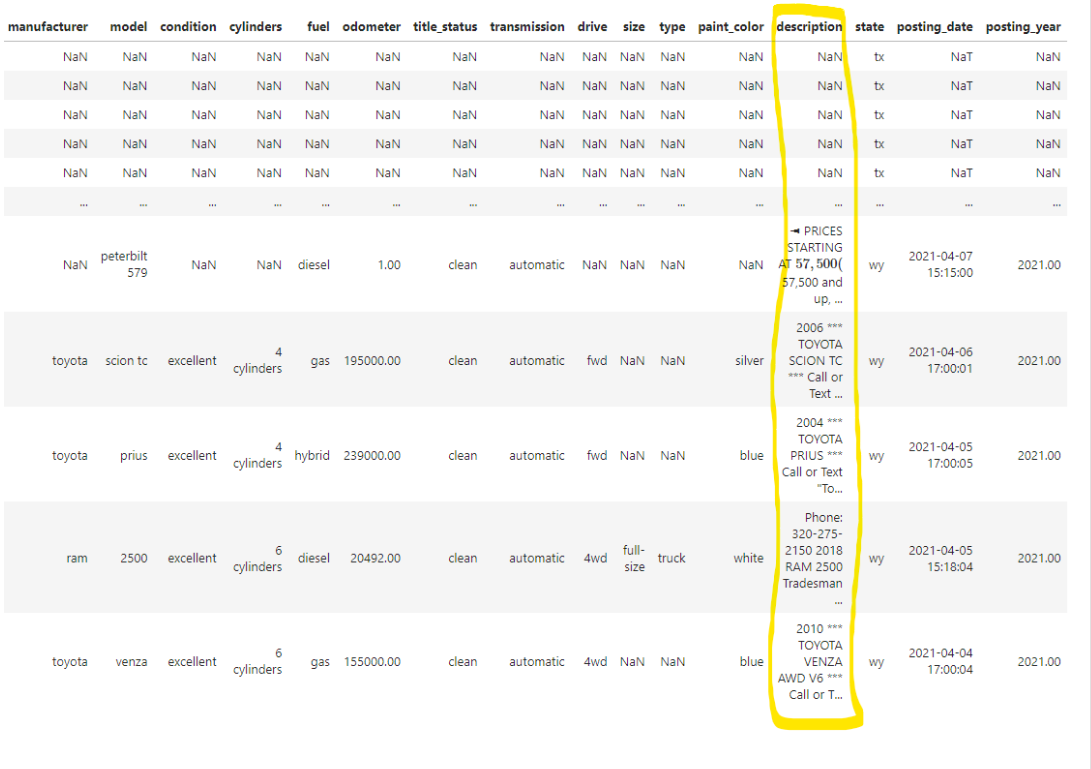

In [40]:
# Drop description column
df_cleaned.drop(columns=["description"], inplace=True)

### Drop rows where price is less than 500

In [41]:
# Step 1: Drop rows where price is less than 500
df_cleaned = df_cleaned[df_cleaned['price'] >= 500]

### Extract manufacture year

In [42]:
df_cleaned.T

,27,28,29,30,31,32,33,34,35,36,...,426870,426871,426872,426873,426874,426875,426876,426877,426878,426879
region,auburn,auburn,auburn,auburn,auburn,auburn,auburn,auburn,auburn,auburn,...,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming,wyoming
price,33590,22590,39590,30990,15000,27990,34590,35000,29990,38590,...,22990,17990,32590,30990,33590,23590,30590,34990,28990,30590
year,2014-01-01,2010-01-01,2020-01-01,2017-01-01,2013-01-01,2012-01-01,2016-01-01,2019-01-01,2016-01-01,2011-01-01,...,2020-01-01,2018-01-01,2020-01-01,2018-01-01,2018-01-01,2019-01-01,2020-01-01,2020-01-01,2018-01-01,2019-01-01
manufacturer,gmc,chevrolet,chevrolet,toyota,ford,gmc,chevrolet,toyota,chevrolet,chevrolet,...,hyundai,kia,mercedes-benz,mercedes-benz,lexus,nissan,volvo,cadillac,lexus,bmw
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt,sierra 2500 hd extended cab,silverado 1500 double,tacoma,colorado extended cab,corvette grand sport,...,sonata se sedan 4d,sportage lx sport utility 4d,c-class c 300,glc 300 sport,gs 350 sedan 4d,maxima s sedan 4d,s60 t5 momentum sedan 4d,xt4 sport suv 4d,es 350 sedan 4d,4 series 430i gran coupe
condition,good,good,good,good,excellent,good,good,excellent,good,good,...,good,good,good,good,good,good,good,good,good,good
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders,8 cylinders,6 cylinders,6 cylinders,6 cylinders,8 cylinders,...,NaN,NaN,NaN,NaN,6 cylinders,6 cylinders,NaN,NaN,6 cylinders,NaN
fuel,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,diesel,gas,gas
odometer,57923.0,71229.0,19160.0,41124.0,128000.0,68696.0,29499.0,43000.0,17302.0,30237.0,...,3066.0,34239.0,19059.0,15080.0,30814.0,32226.0,12029.0,4174.0,30112.0,22716.0
title_status,clean,clean,clean,clean,clean,clean,clean,clean,clean,clean,...,clean,clean,clean,clean,clean,clean,clean,clean,clean,clean


In [43]:
# Convert the 'year' column to datetime format
df_cleaned['year'] = pd.to_datetime(df_cleaned['year'], errors='coerce')

# Extract the year and handle NaN values
df_cleaned["year"] = df_cleaned["year"].dt.year
df_cleaned["year"] = df_cleaned["year"].apply(lambda x: str(int(x)) if pd.notnull(x) else '')

C:\Users\omara\AppData\Local\Temp\ipykernel_31636\2627438887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = pd.to_datetime(df_cleaned['year'], errors='coerce')
C:\Users\omara\AppData\Local\Temp\ipykernel_31636\2627438887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["year"] = df_cleaned["year"].dt.year
C:\Users\omara\AppData\Local\Temp\ipykernel_31636\2627438887.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

**The model will be trained on three different dataframes**
1. Dataframe where the outliers filled with a general median, and missing values filled.
2. Dataframe where the outliers filled with a dynamic median, and missing values filled.
3. Datafram where the outliers and missing values are dropped.

### Fill in empty values and outliers

#### With general median

In [44]:
df_filled_empty_outliers = df_cleaned.copy()

##### Visualize price distribution 

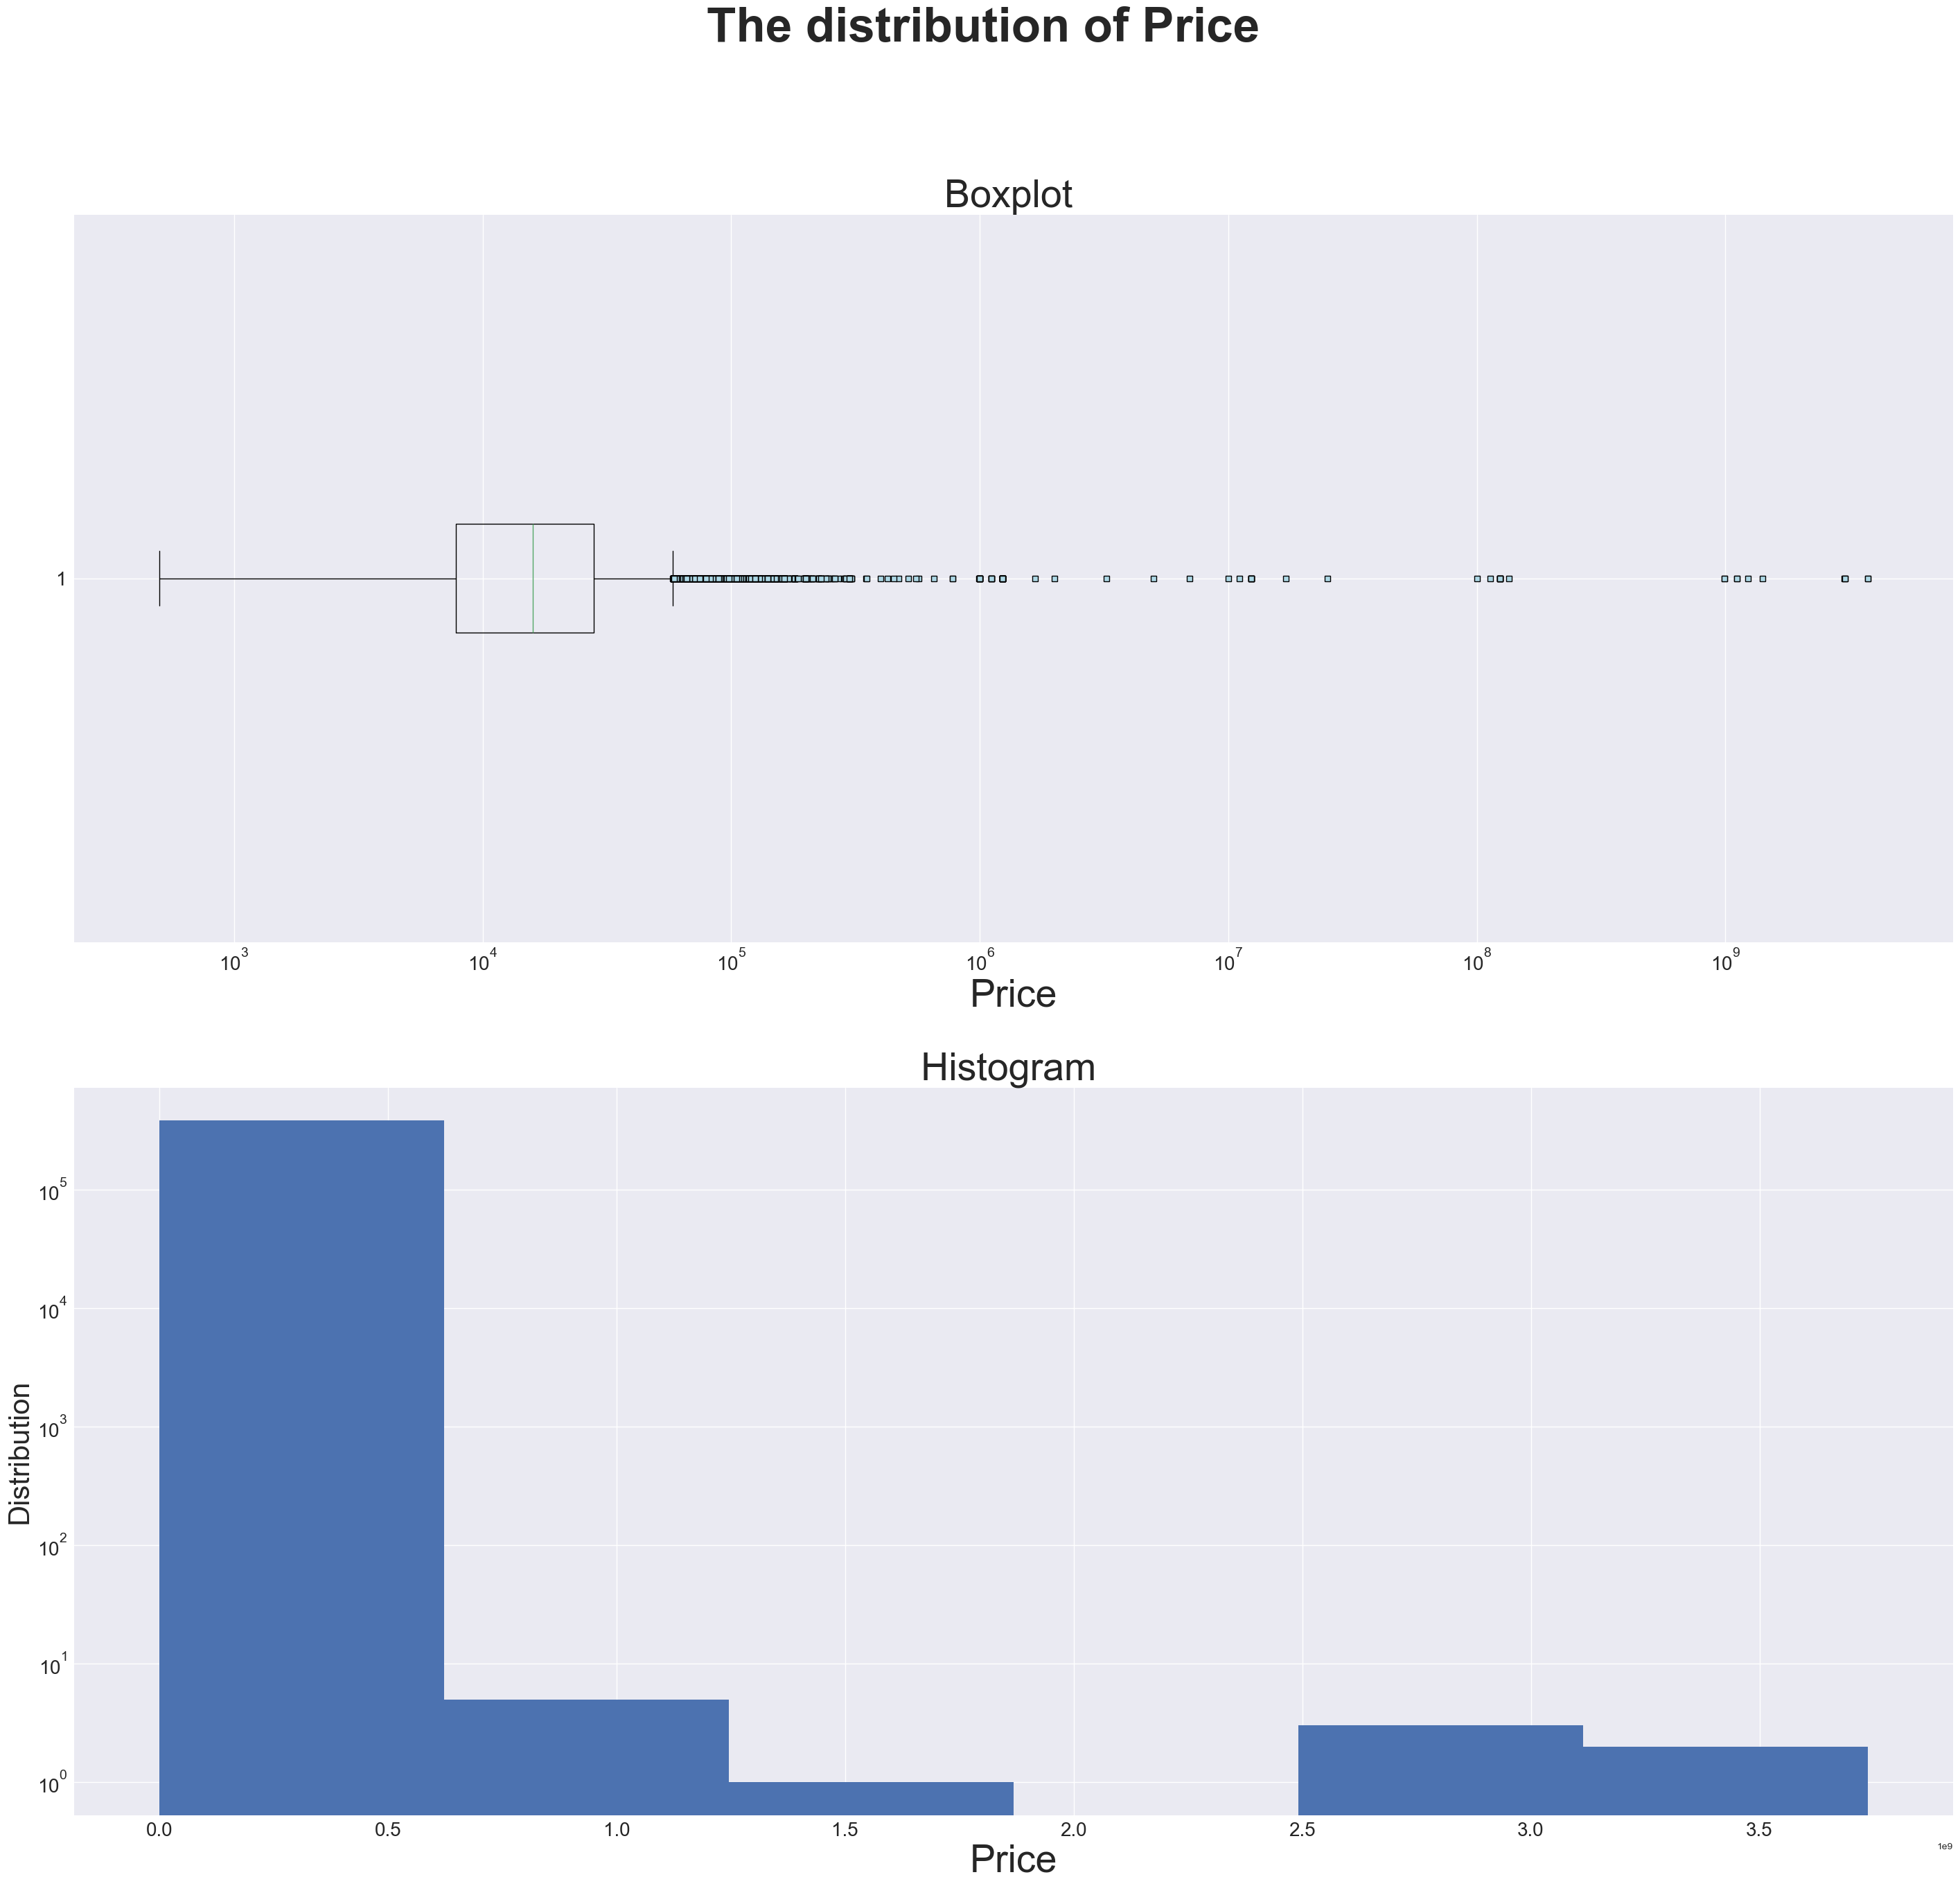

In [45]:
visualize_distribution(df_filled_empty_outliers, "price", "Price", True)

##### Get price lower & upper bounds (Q0 & Q4)

In [46]:
lower_bound, upper_bound = calculate_numerical_quartiles("price", df_filled_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -22485.0, Q1: 7800.0, Median: 15900.0, Q3: 27990.0, Upper bound: 58275.0


##### Fill price outliers with median

In [47]:
# Calculate the median
median_price = df_filled_empty_outliers['price'].median()

# Identify and fill outliers with the median value
df_filled_empty_outliers['price'] = df_filled_empty_outliers['price'].apply(
    lambda x: median_price if (x < lower_bound or x > upper_bound) else x
)

##### Get price lower & upper bounds (Q0 & Q4)

In [48]:
lower_bound, upper_bound = calculate_numerical_quartiles("price", df_filled_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -20985.0, Q1: 7800.0, Median: 15900.0, Q3: 26990.0, Upper bound: 55775.0


##### Visualize price distribution 

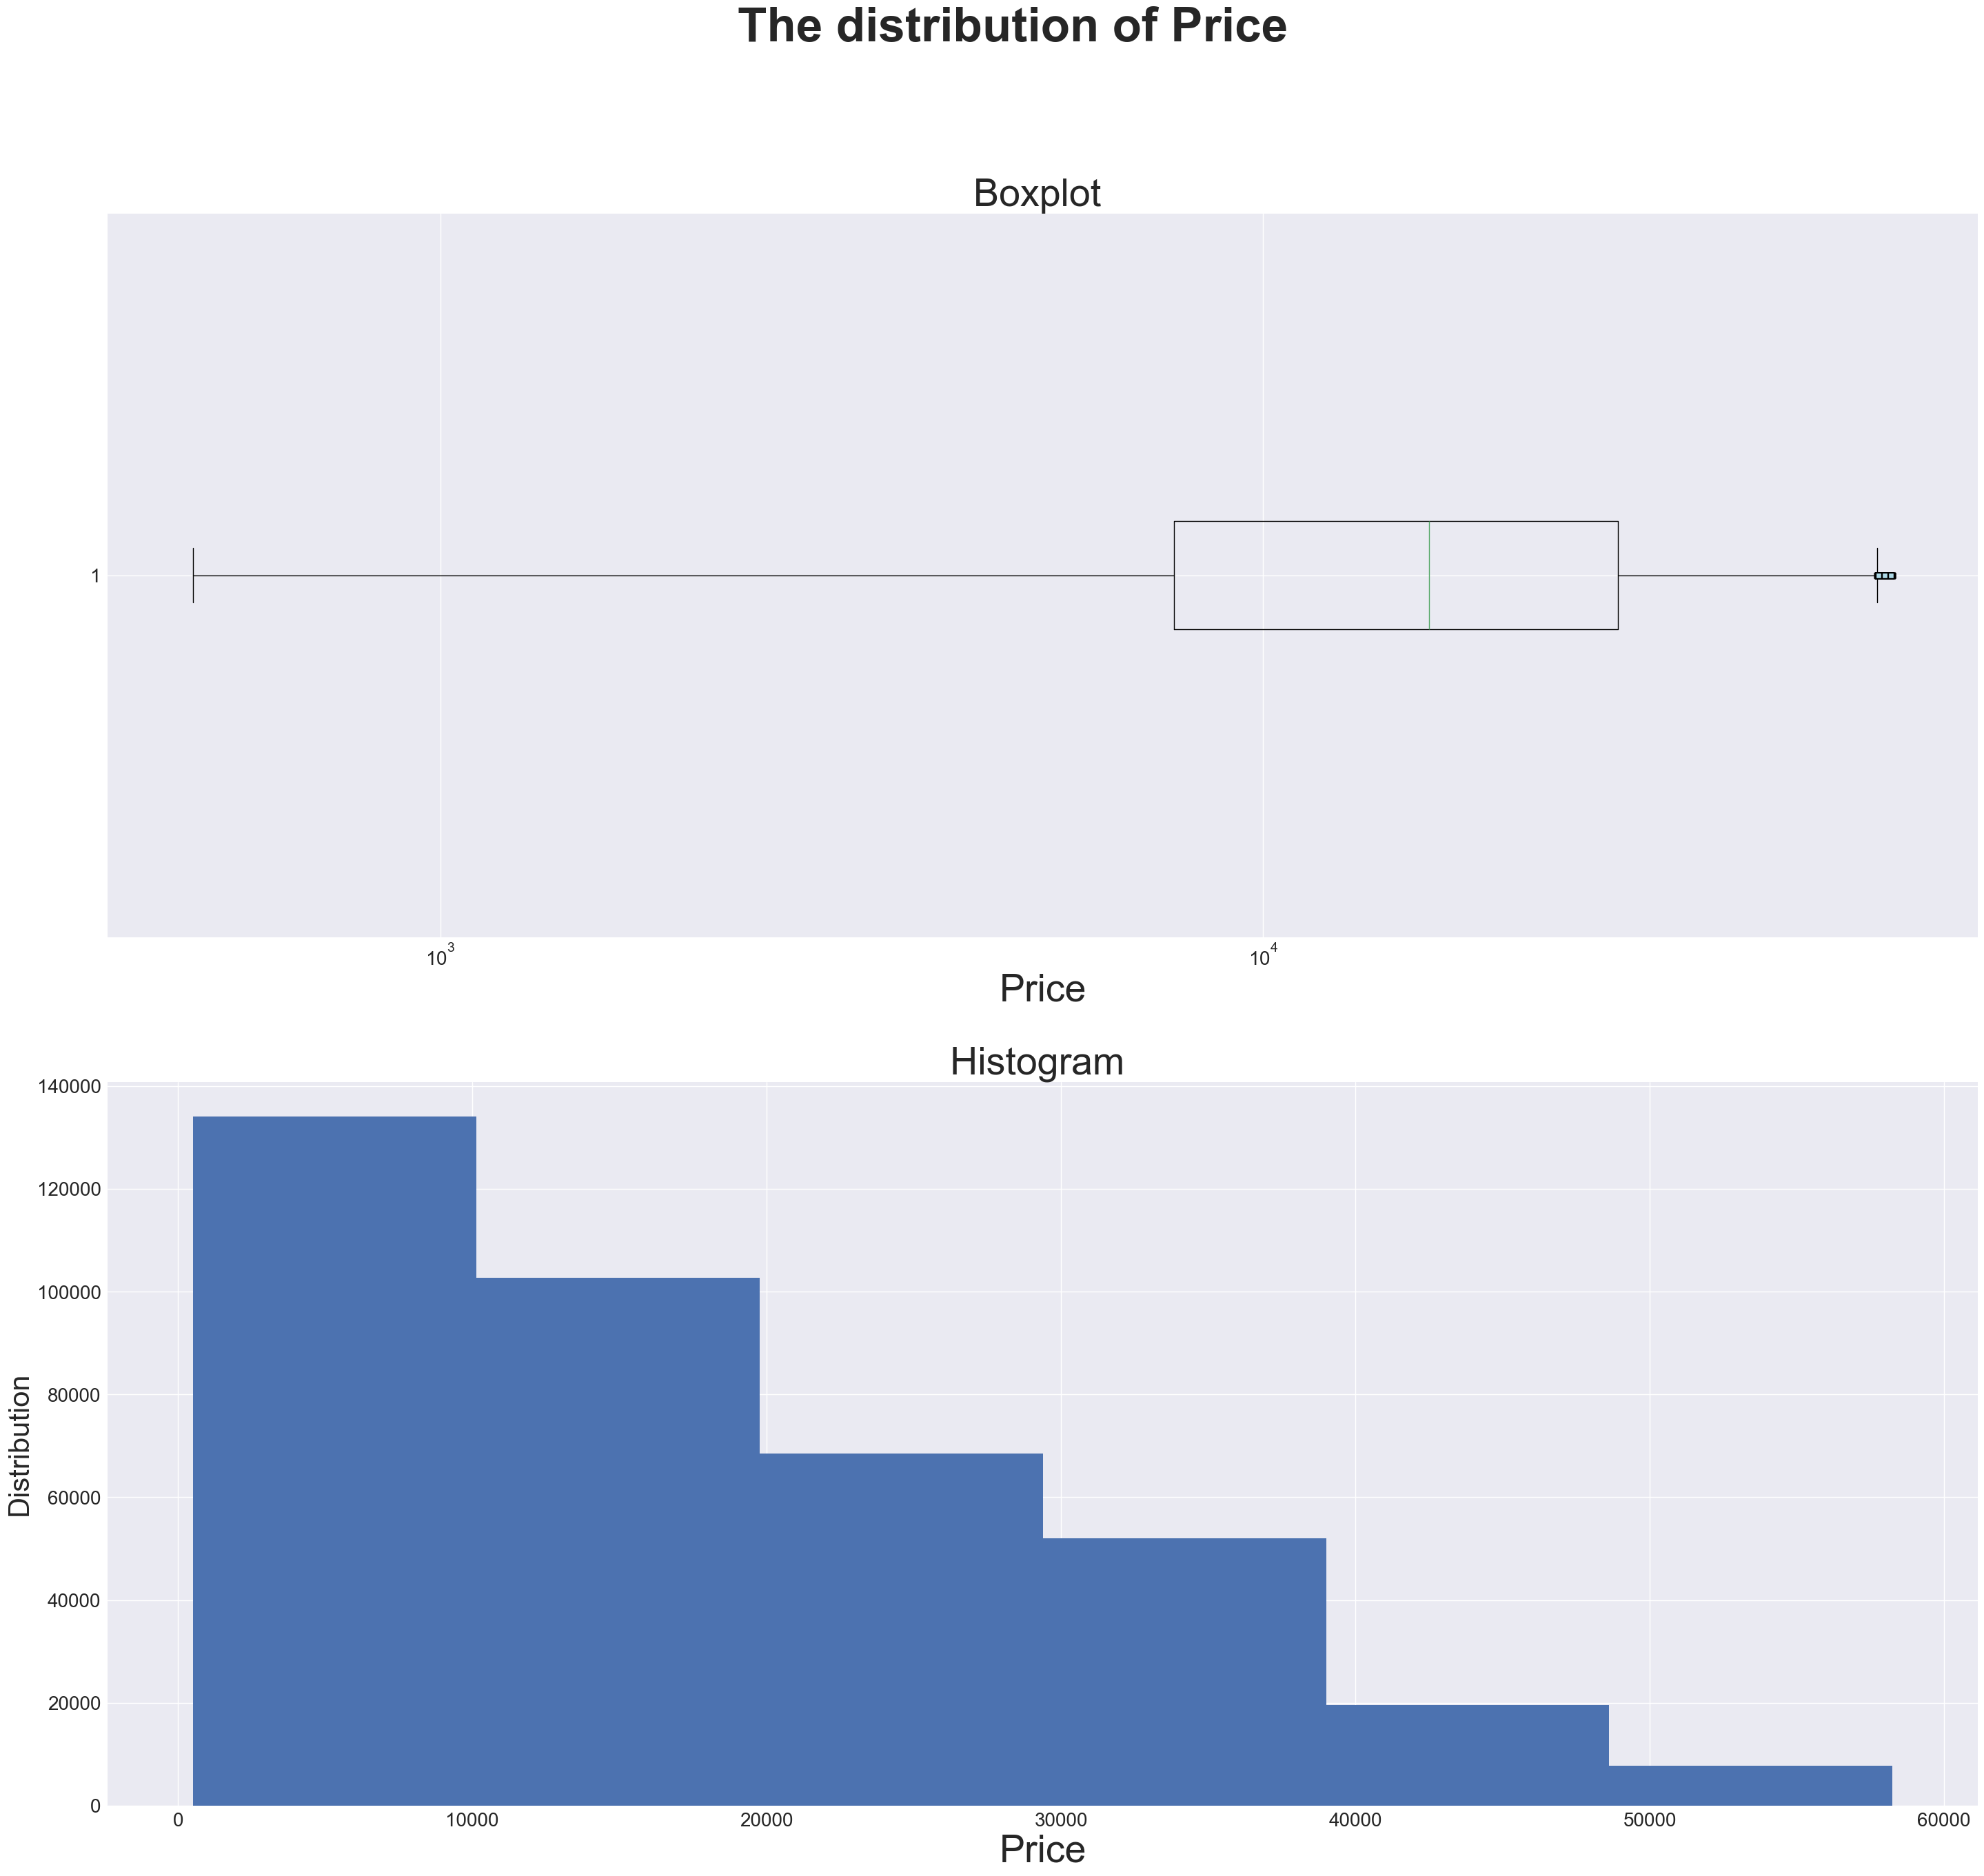

In [49]:
visualize_distribution(df_filled_empty_outliers, "price", "Price", False)

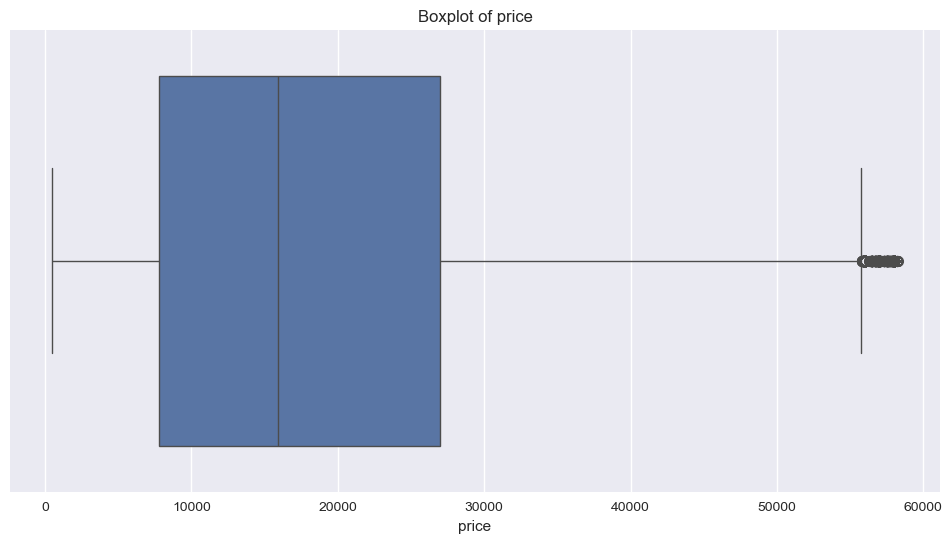

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers['price'])
plt.title('Boxplot of price')
plt.xlabel('price')
plt.show()

##### Visualize odometer distribution 

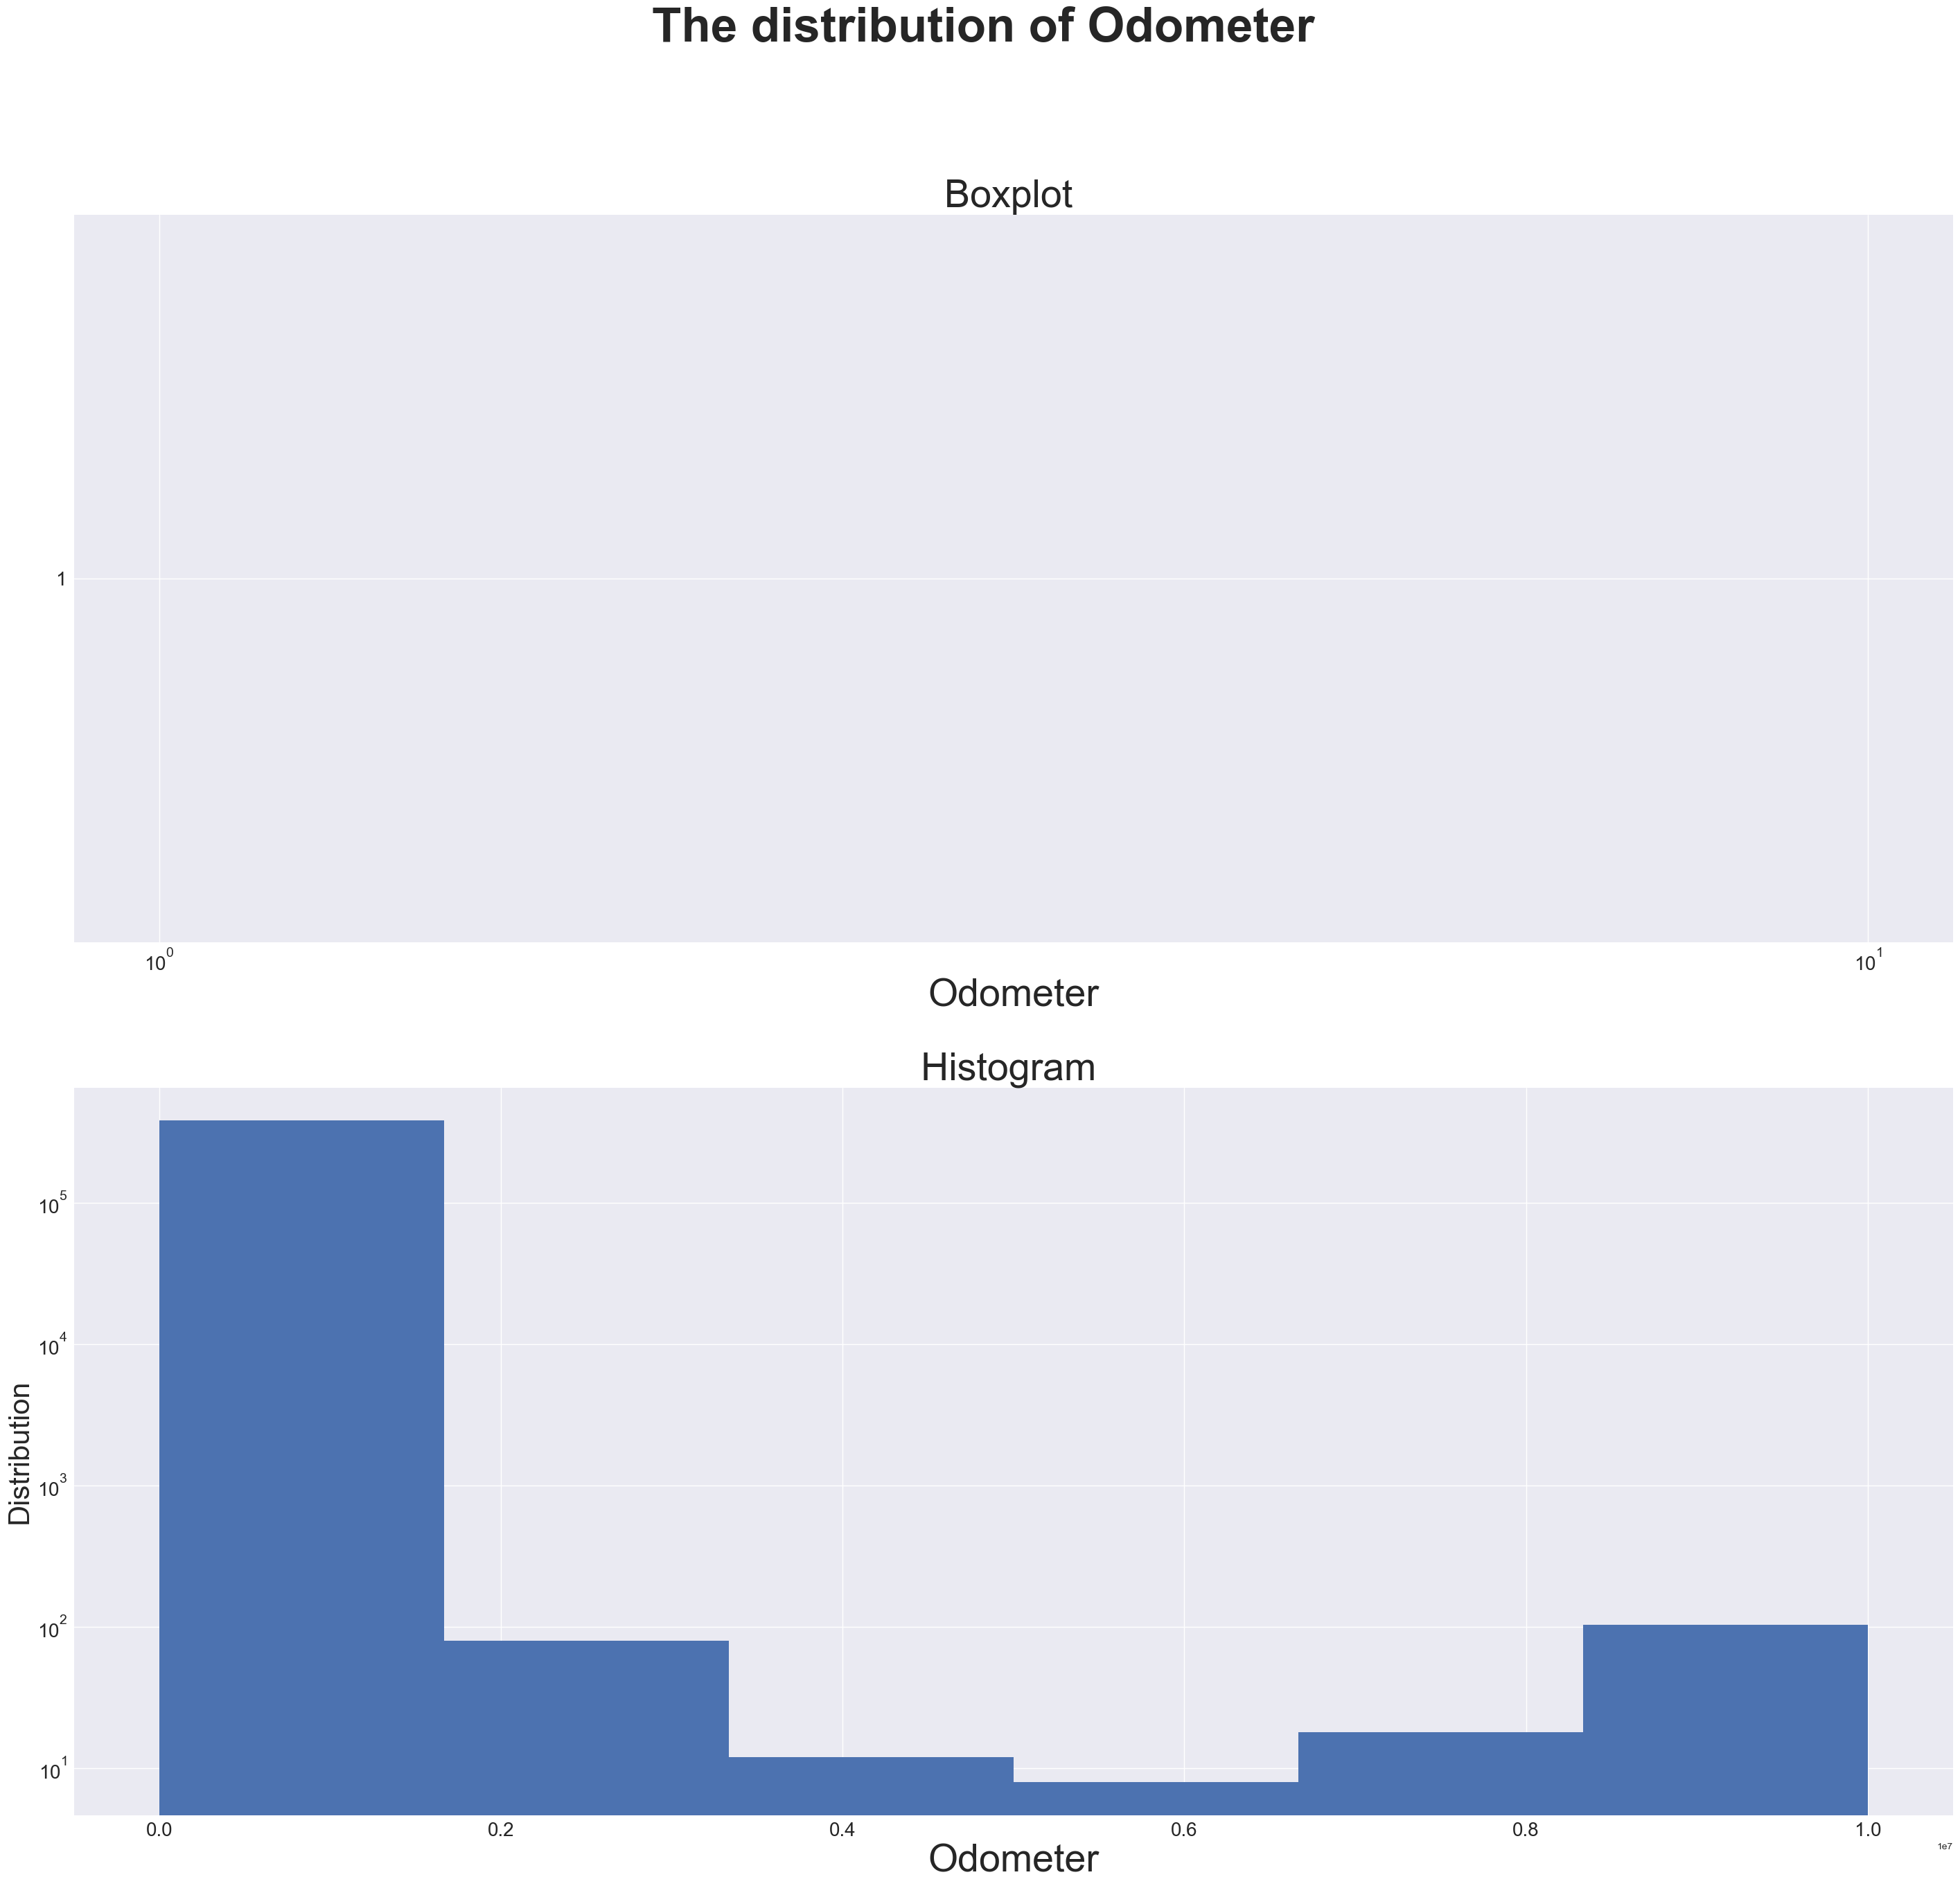

In [51]:
visualize_distribution(df_filled_empty_outliers, "odometer", "Odometer", True)

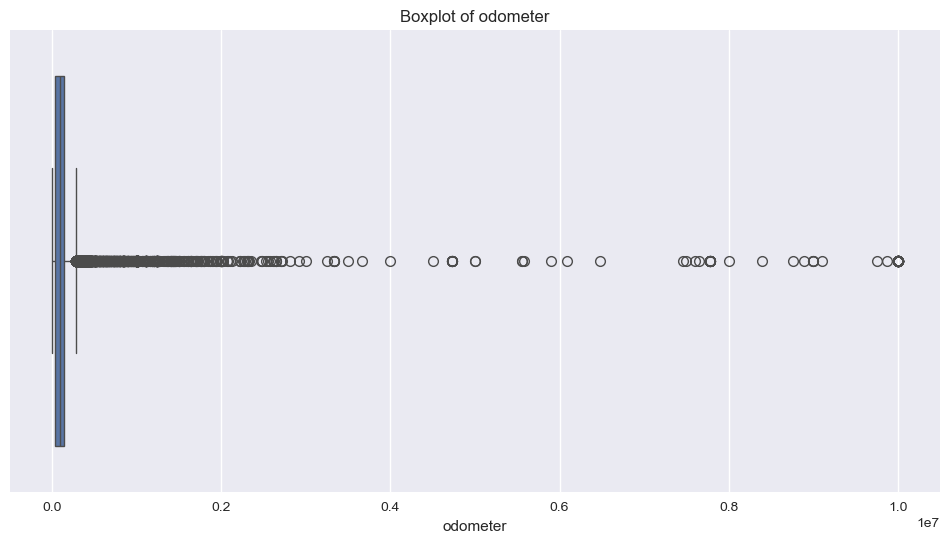

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Get price lower & upper bounds (Q0 & Q4)

In [53]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -108575.0, Q1: 38170.0, Median: 87684.0, Q3: 136000.0, Upper bound: 282745.0


##### Fill odometer outliers & empty values with median

In [54]:
# Calculate the median
median_odometer = df_filled_empty_outliers['odometer'].median()

# Fill NaN values with the median
df_filled_empty_outliers['odometer'].fillna(median_odometer, inplace=True)

# Identify and fill outliers with the median value
df_filled_empty_outliers['odometer'] = df_filled_empty_outliers['odometer'].apply(
    lambda x: median_odometer if (x < lower_bound or x > upper_bound) else x
)

C:\Users\omara\AppData\Local\Temp\ipykernel_31636\30522058.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled_empty_outliers['odometer'].fillna(median_odometer, inplace=True)


##### Get odometer lower & upper bounds (Q0 & Q4)

In [55]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -104122.0, Q1: 38471.0, Median: 87684.0, Q3: 133533.0, Upper bound: 276126.0


##### Visualize odometer distribution 

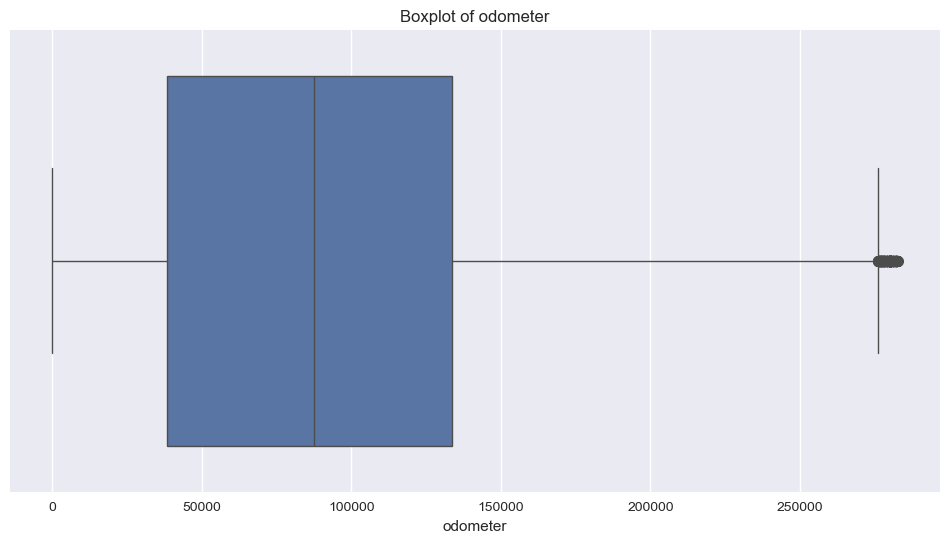

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Check dataframe

In [57]:
df_filled_empty_outliers.head().T

,27,28,29,30,31
region,auburn,auburn,auburn,auburn,auburn
price,33590.0,22590.0,39590.0,30990.0,15000.0
year,2014,2010,2020,2017,2013
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.0,71229.0,19160.0,41124.0,128000.0
title_status,clean,clean,clean,clean,clean


In [58]:
df_filled_empty_outliers.isna().sum()

region               0
price                0
year                 0
manufacturer     15566
model             4509
condition       145613
cylinders       157091
fuel              2532
odometer             0
title_status      6936
transmission      1757
drive           117220
size            276398
type             83163
paint_color     111590
state                0
dtype: int64

##### Check correlation

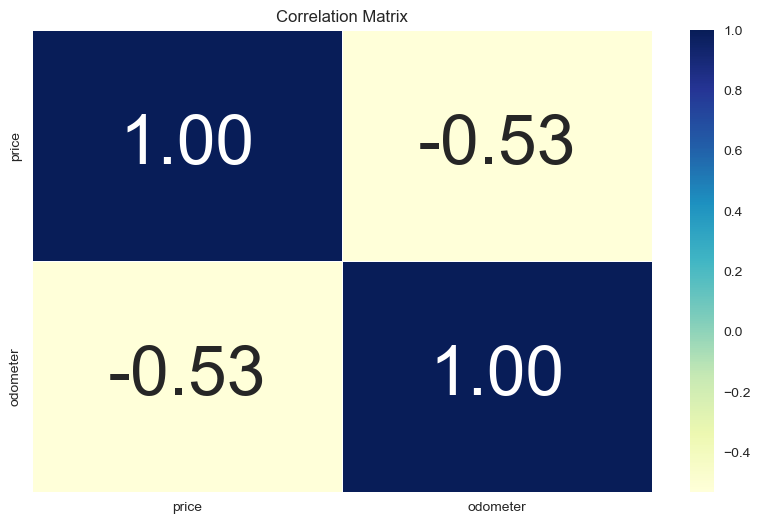

In [59]:
# Drop columns where any of the specified rows contain NaN values
df_temp_numeric = df_filled_empty_outliers.drop(["region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"], axis=1)

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu",
            annot=True)
plt.title('Correlation Matrix')
plt.show()

#### With dynamic median (group by manufacturer)

In [60]:
# Group by manyfacturer
df_filled_empty_outliers_dyn = df_cleaned.copy()

##### Visualize price distribution 

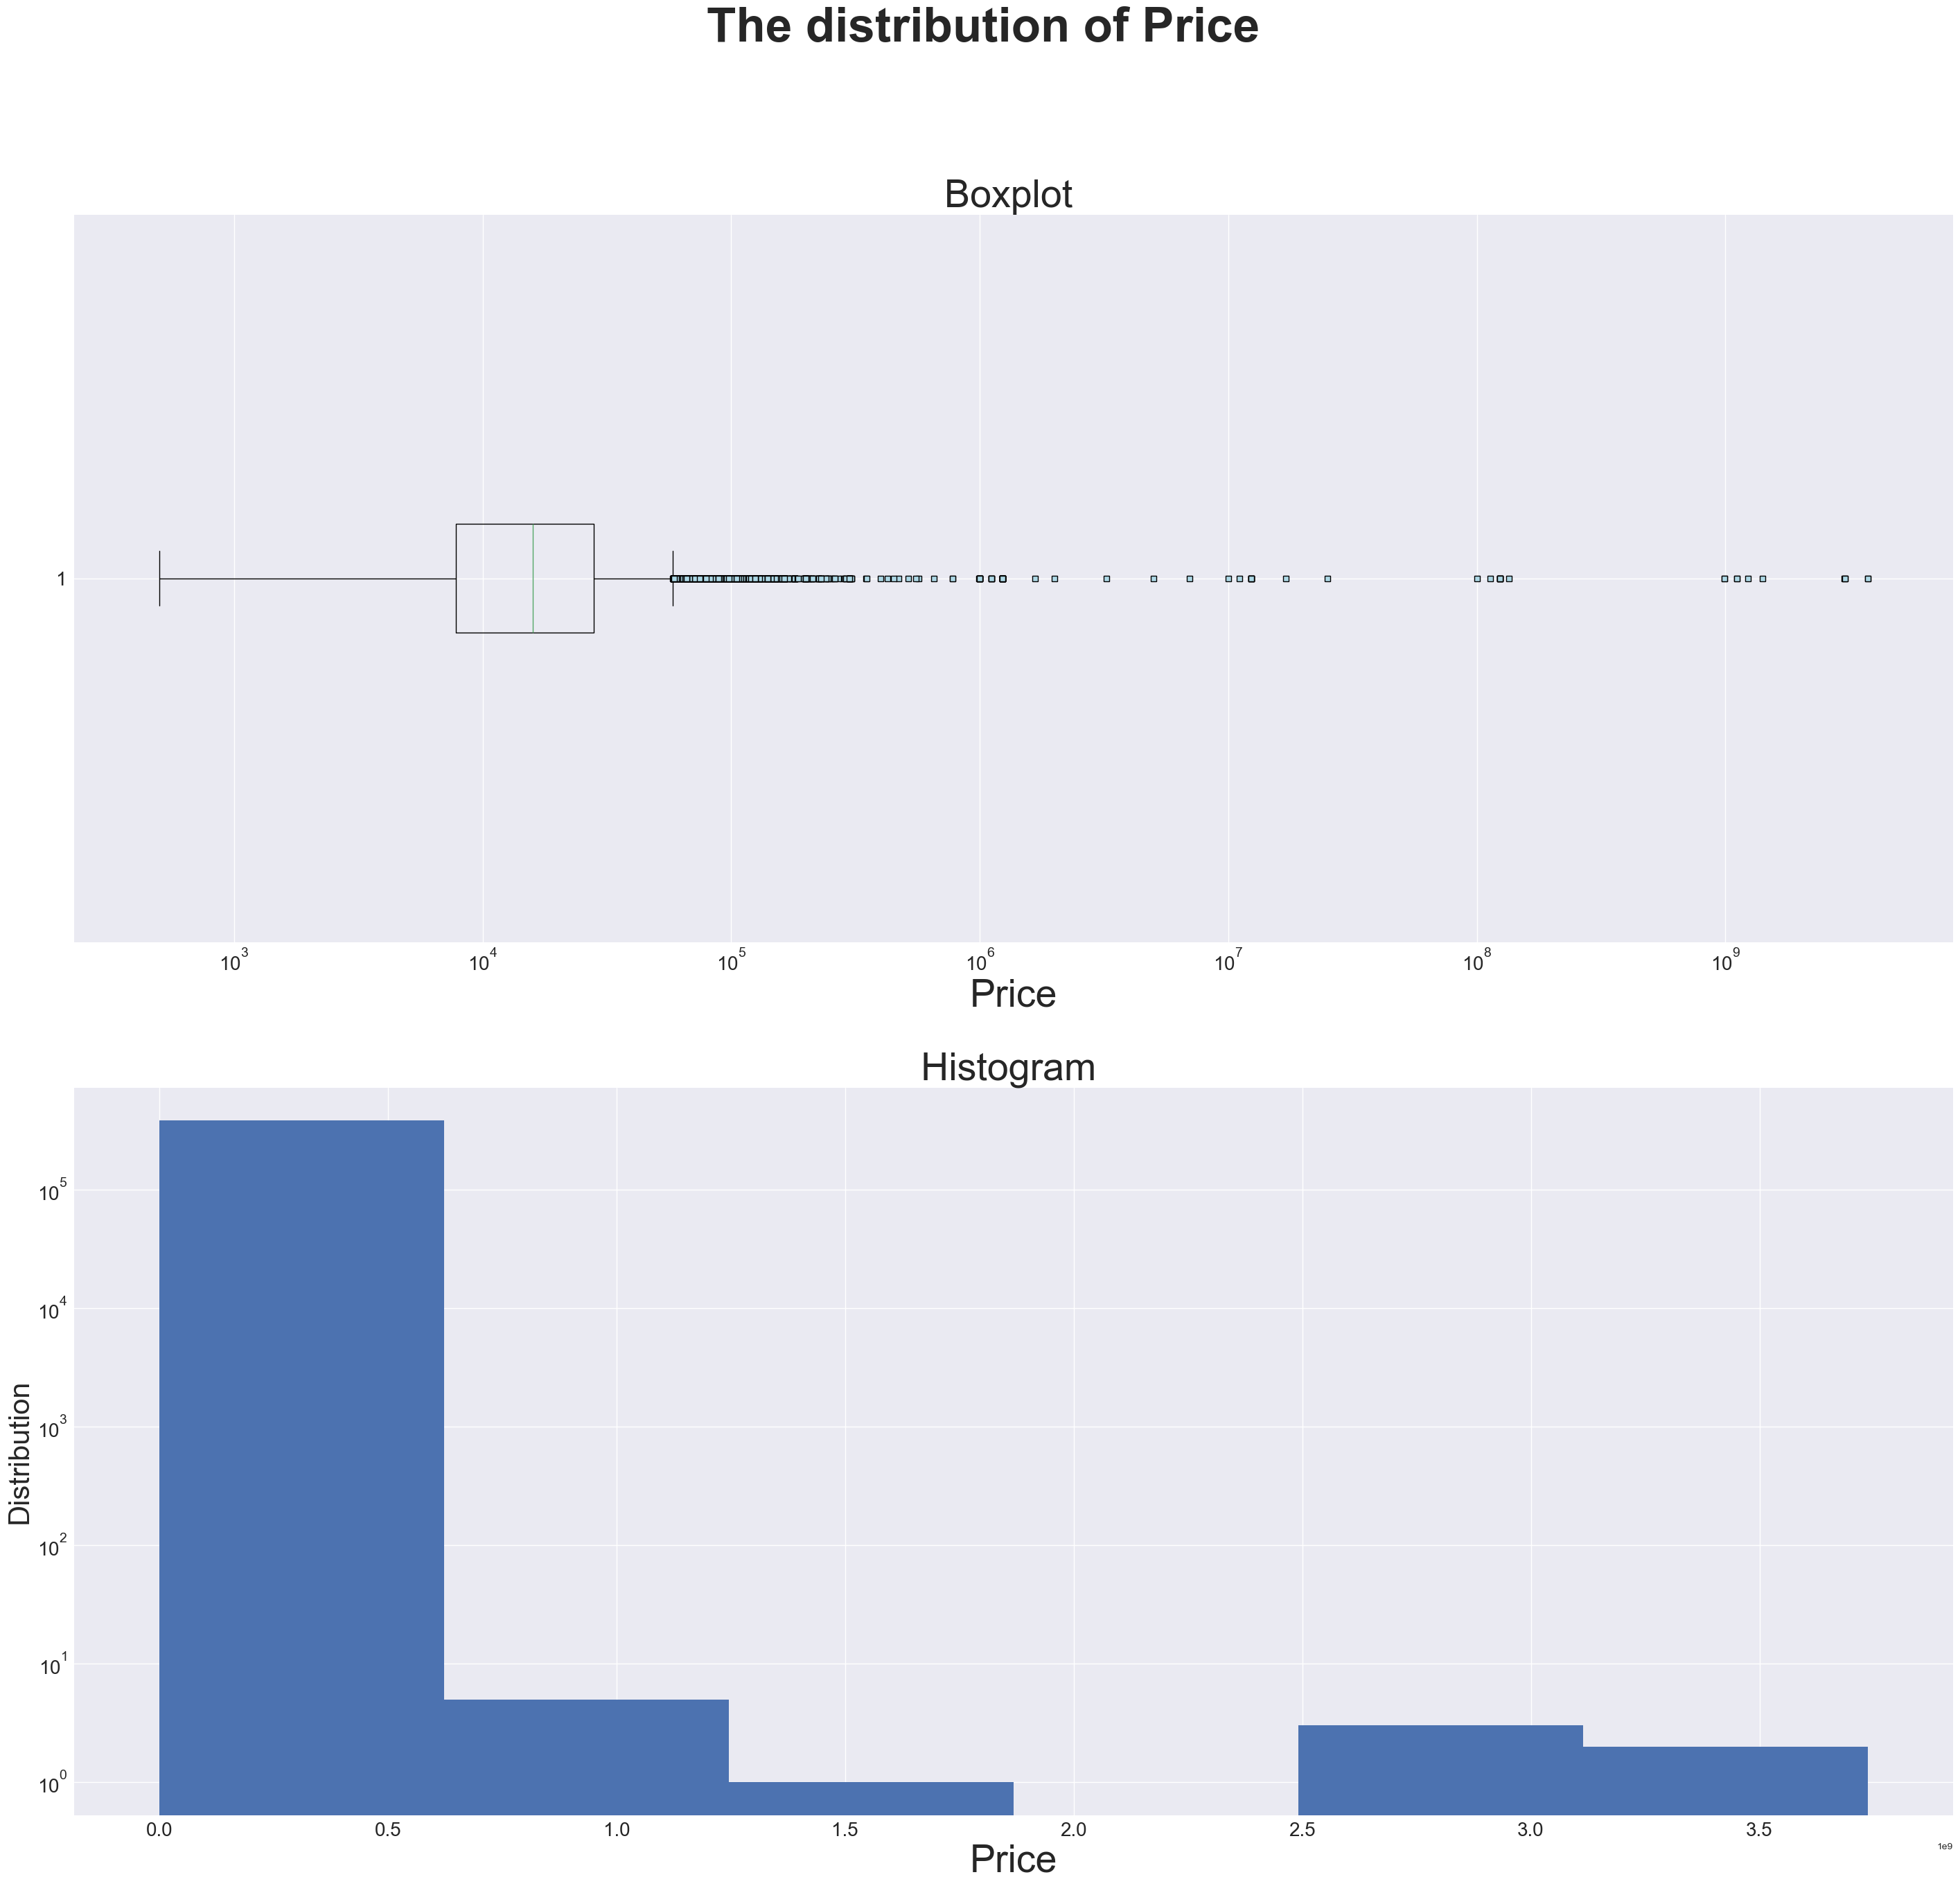

In [61]:
visualize_distribution(df_filled_empty_outliers_dyn, "price", "Price", True)

##### Get price lower & upper bounds (Q0 & Q4)

In [62]:
lower_bound, upper_bound = calculate_numerical_quartiles("price", df_filled_empty_outliers_dyn)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -22485.0, Q1: 7800.0, Median: 15900.0, Q3: 27990.0, Upper bound: 58275.0


##### Fill price outliers with median

In [63]:
# Calculate the median
median_price = df_filled_empty_outliers_dyn['price'].median()

# Fill NaN values in the 'manufacturer' column with a placeholder
df_filled_empty_outliers_dyn['manufacturer'] = df_filled_empty_outliers_dyn['manufacturer'].fillna('Unknown')

# Calculate median price for each manufacturer
median_price_per_manufacturer = df_filled_empty_outliers_dyn.groupby('manufacturer')['price'].median()

# Function to replace outliers with the median value for each manufacturer
def replace_outliers(row, column, lower_bound, upper_bound, medians, general_median):
    if (row[column] < lower_bound or row[column] > upper_bound):
        if medians[row['manufacturer']] < lower_bound or medians[row['manufacturer']] > upper_bound:
            return general_median
        else:        
            return medians[row['manufacturer']]
    else:
        return row[column]

# Apply the function to replace outliers
df_filled_empty_outliers_dyn['price'] = df_filled_empty_outliers_dyn.apply(
    replace_outliers, axis=1, args=("price", lower_bound, upper_bound, median_price_per_manufacturer, median_price)
)

##### Get price lower & upper bounds (Q0 & Q4)

In [64]:
lower_bound, upper_bound = calculate_numerical_quartiles("price", df_filled_empty_outliers_dyn)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -20985.0, Q1: 7800.0, Median: 15763.0, Q3: 26990.0, Upper bound: 55775.0


##### Visualize price distribution 

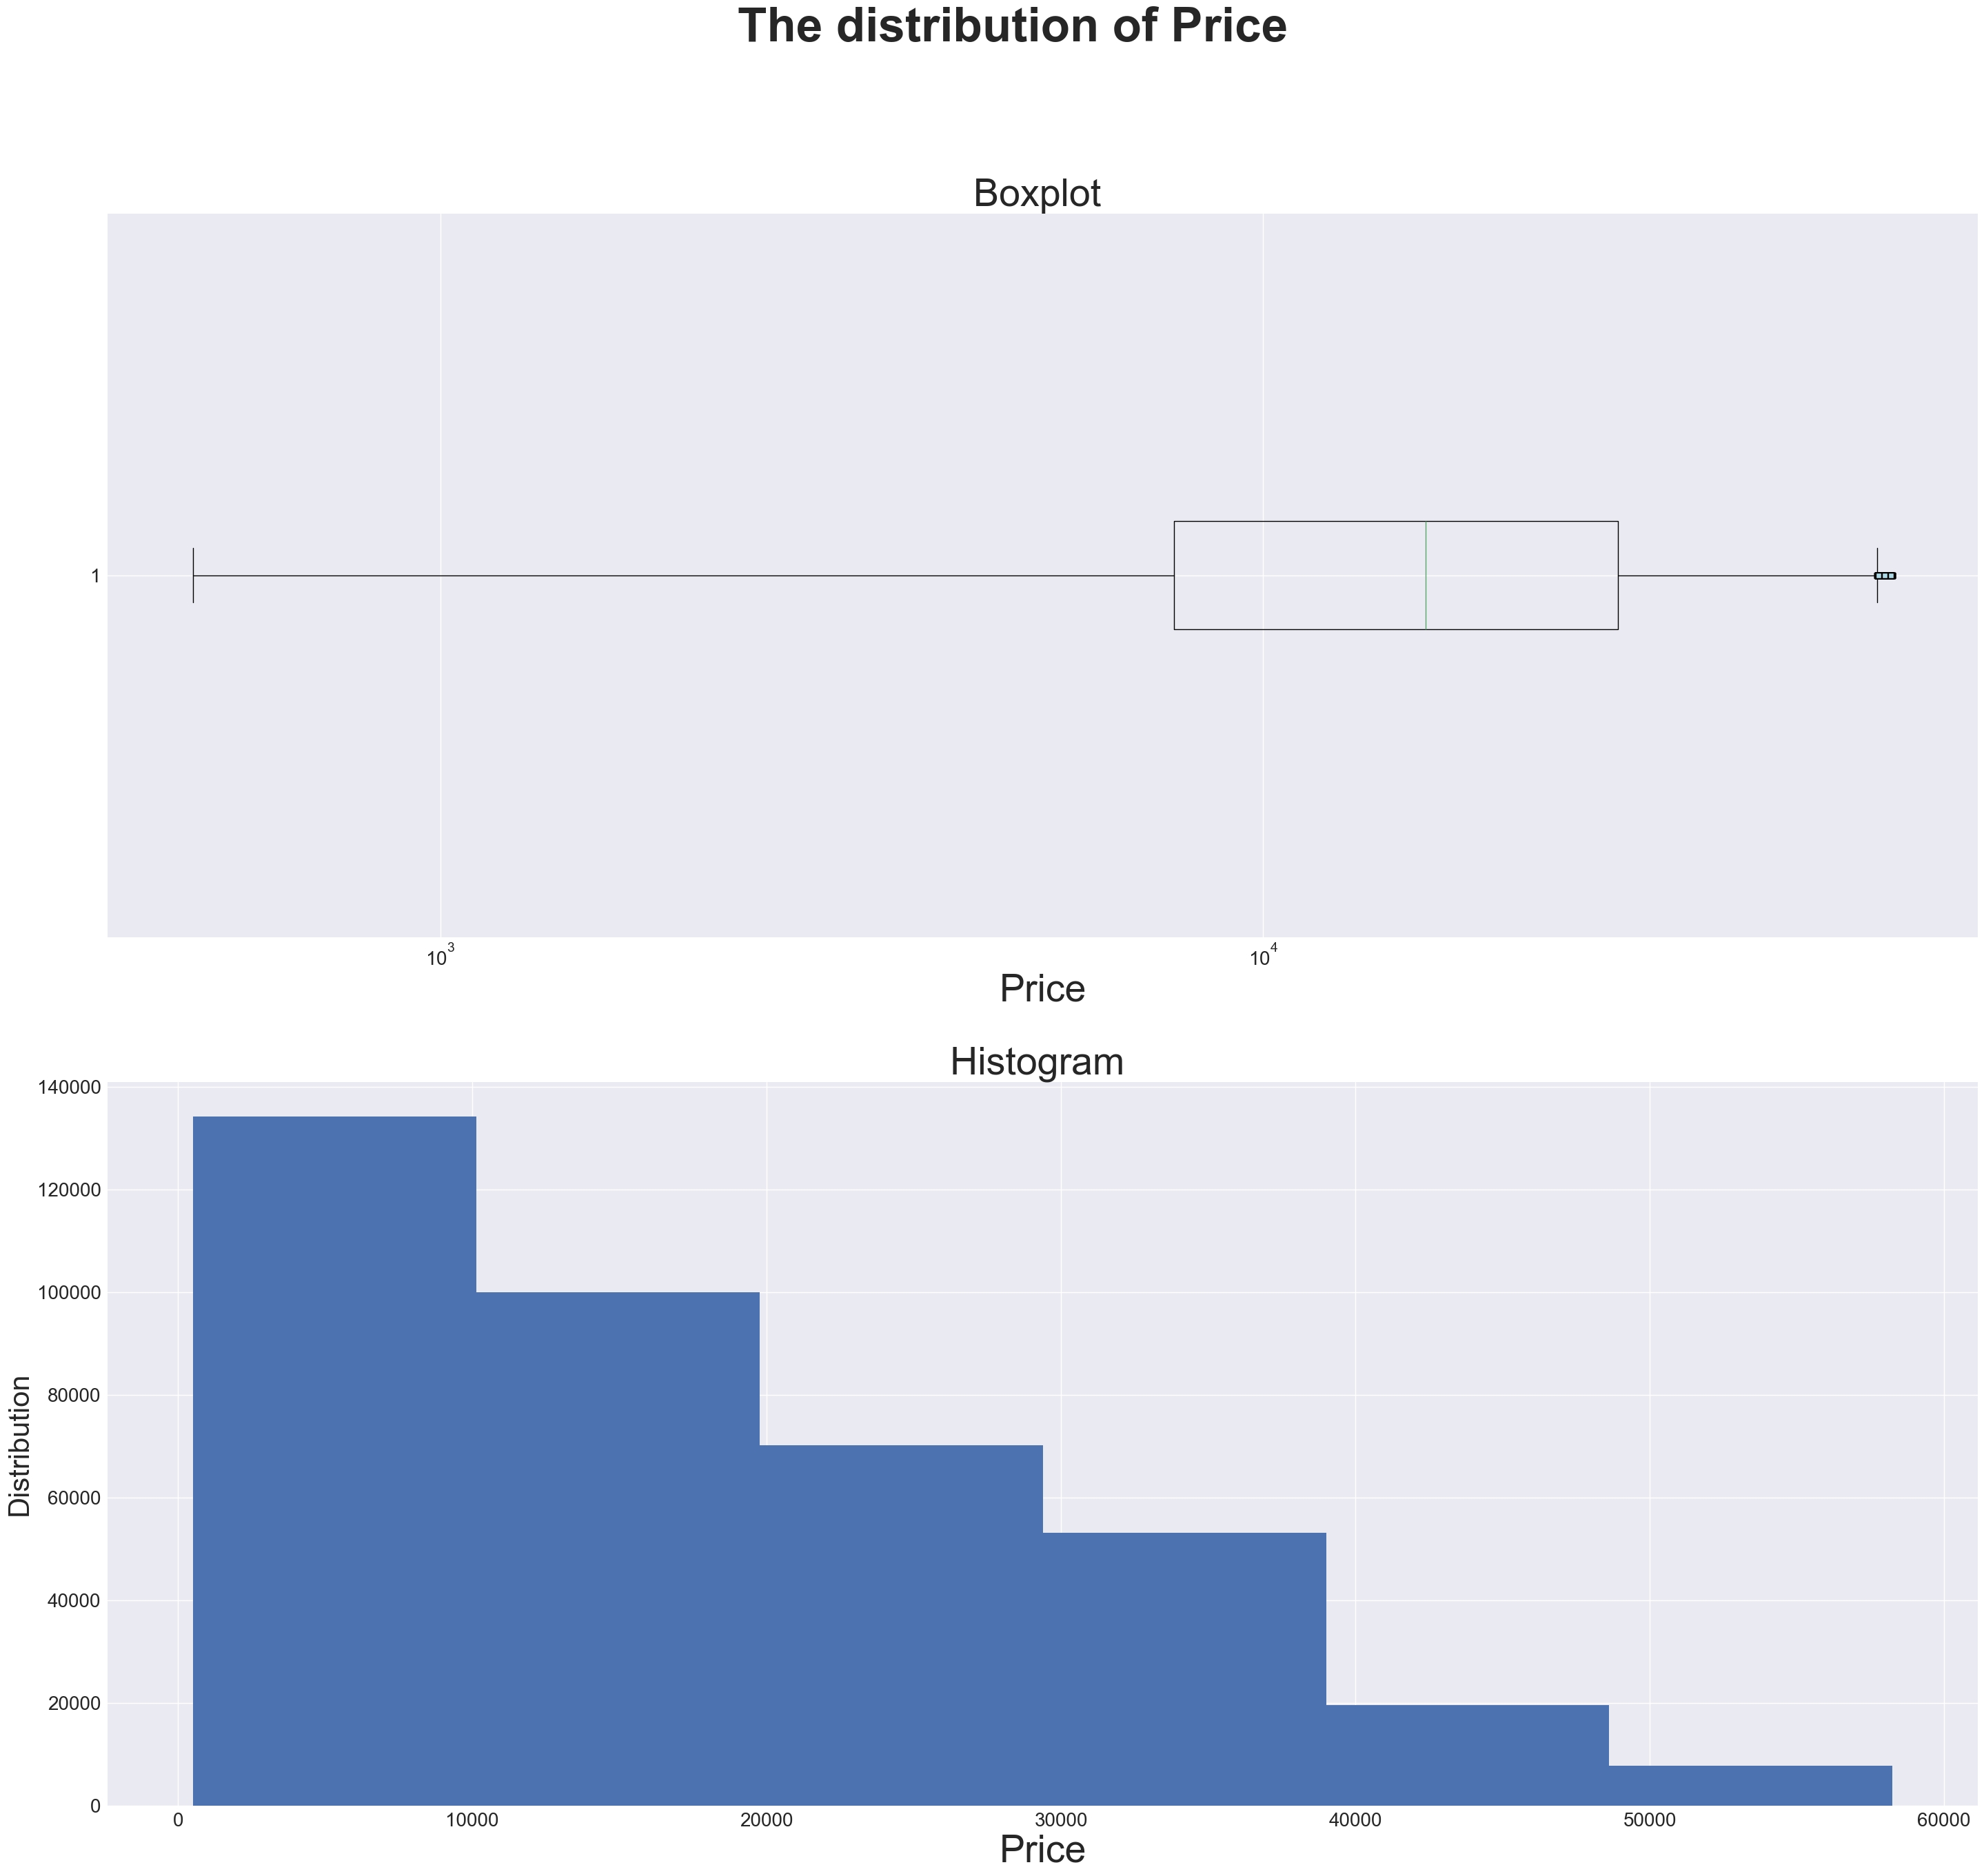

In [65]:
visualize_distribution(df_filled_empty_outliers_dyn, "price", "Price", False)

##### Visualize odometer distribution 

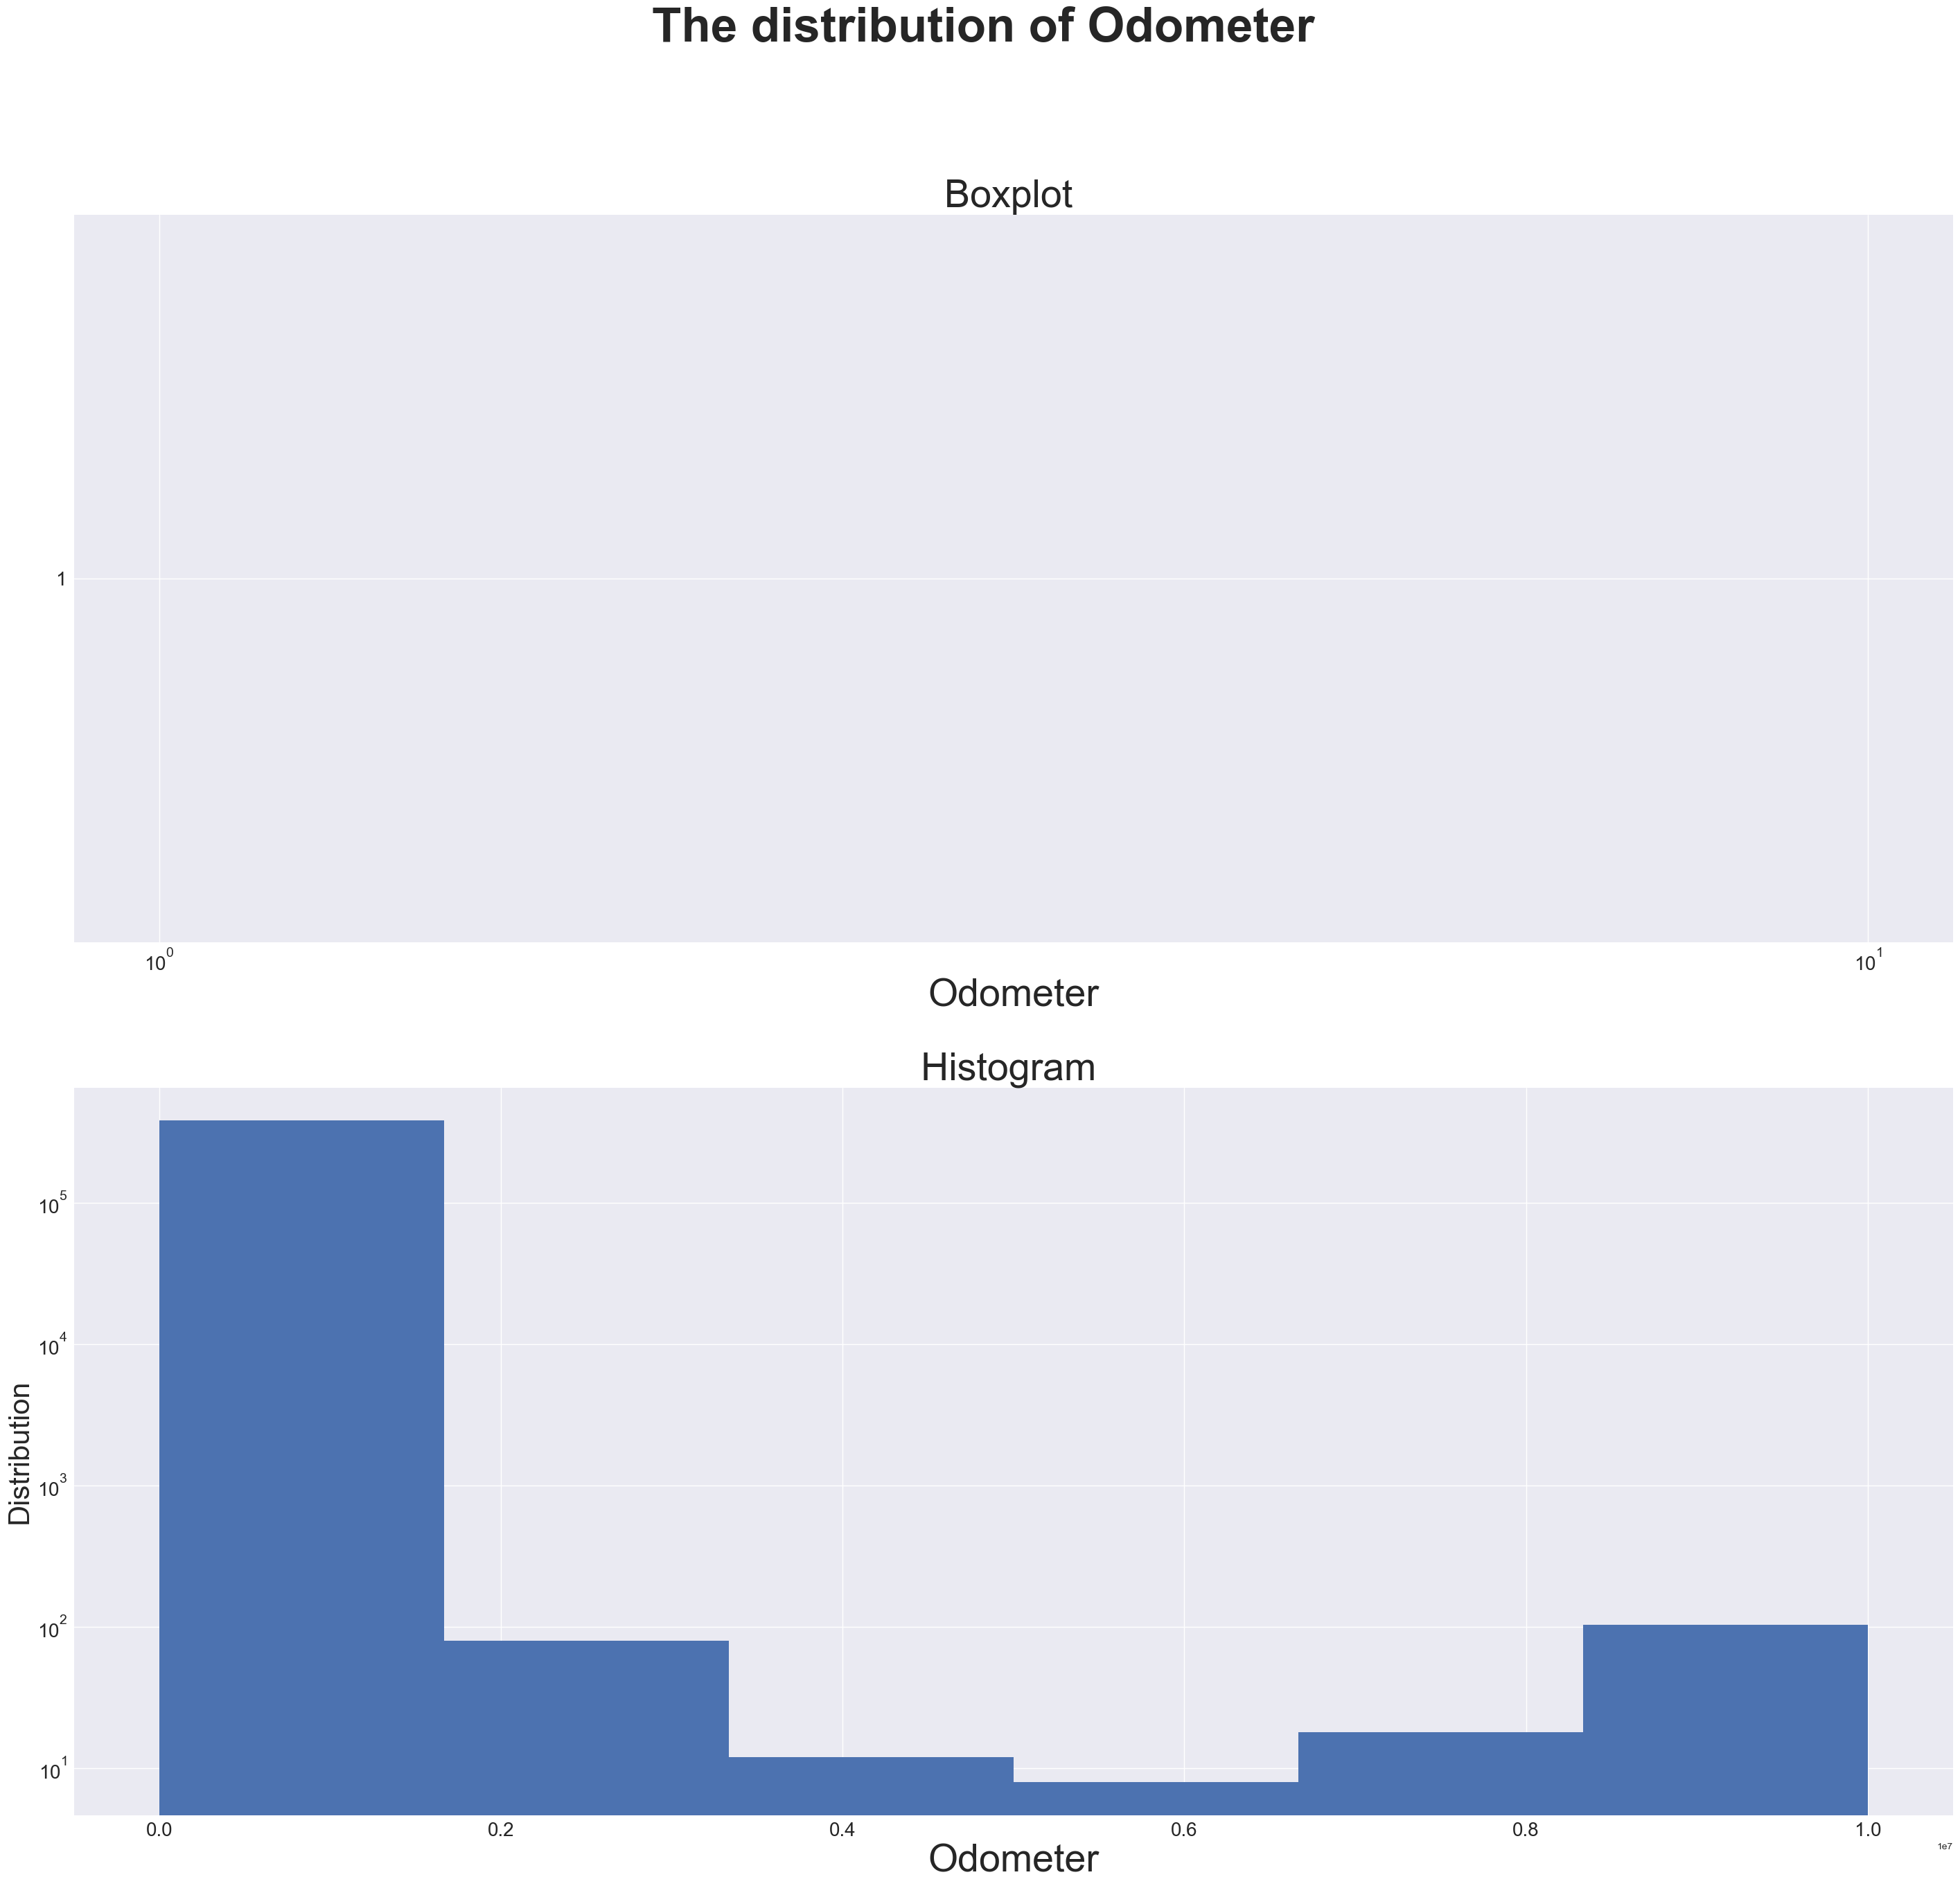

In [66]:
visualize_distribution(df_filled_empty_outliers_dyn, "odometer", "Odometer", True)

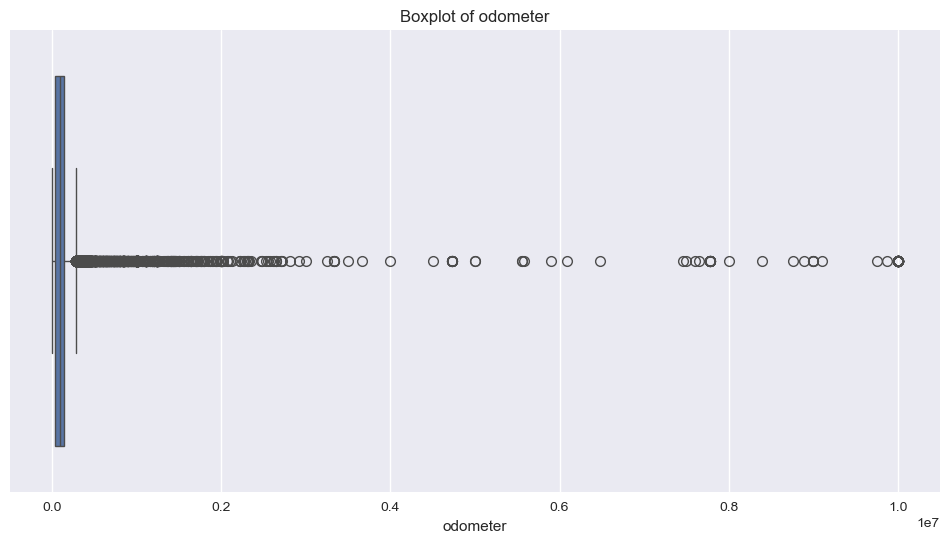

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers_dyn['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Get price lower & upper bounds (Q0 & Q4)

In [68]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers_dyn)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -108575.0, Q1: 38170.0, Median: 87684.0, Q3: 136000.0, Upper bound: 282745.0


In [69]:
df_filled_empty_outliers_dyn

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,auburn,33590.0,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
28,auburn,22590.0,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,auburn,39590.0,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
30,auburn,30990.0,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
31,auburn,15000.0,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590.0,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy
426876,wyoming,30590.0,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy
426877,wyoming,34990.0,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy
426878,wyoming,28990.0,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy


##### Fill odometer outliers & empty values with median

In [70]:
# Calculate the median
median_odometer = df_filled_empty_outliers_dyn['odometer'].median()

# Fill NaN values in the 'manufacturer' column with a placeholder
df_filled_empty_outliers_dyn['manufacturer'] = df_filled_empty_outliers_dyn['manufacturer'].fillna('Unknown')

# Calculate median odometer for each manufacturer
median_odometer_per_manufacturer = df_filled_empty_outliers_dyn.groupby('manufacturer')['odometer'].median()

# Fill NaN values with the median
df_filled_empty_outliers_dyn['odometer'].fillna(median_odometer, inplace=True)

# Apply the function to replace outliers
df_filled_empty_outliers_dyn['odometer'] = df_filled_empty_outliers_dyn.apply(
    replace_outliers, axis=1, args=("odometer", lower_bound, upper_bound, median_odometer_per_manufacturer, median_odometer)
)

C:\Users\omara\AppData\Local\Temp\ipykernel_31636\3682729852.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled_empty_outliers_dyn['odometer'].fillna(median_odometer, inplace=True)


##### Get price lower & upper bounds (Q0 & Q4)

In [71]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers_dyn)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -104129.5, Q1: 38468.0, Median: 87506.0, Q3: 133533.0, Upper bound: 276130.5


##### Visualize odometer distribution 

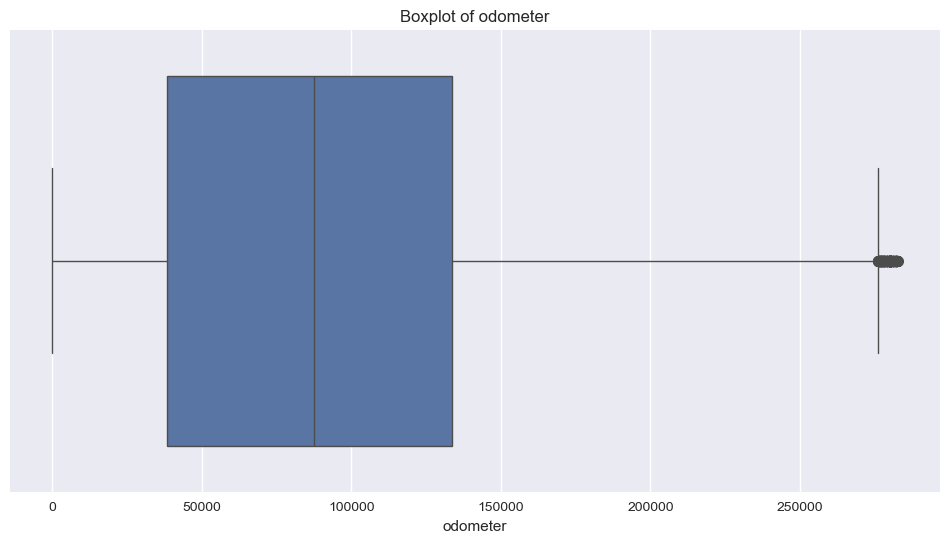

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers_dyn['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Check dataframe

In [73]:
df_filled_empty_outliers_dyn.head().T

,27,28,29,30,31
region,auburn,auburn,auburn,auburn,auburn
price,33590.0,22590.0,39590.0,30990.0,15000.0
year,2014,2010,2020,2017,2013
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.0,71229.0,19160.0,41124.0,128000.0
title_status,clean,clean,clean,clean,clean


##### Check correlation

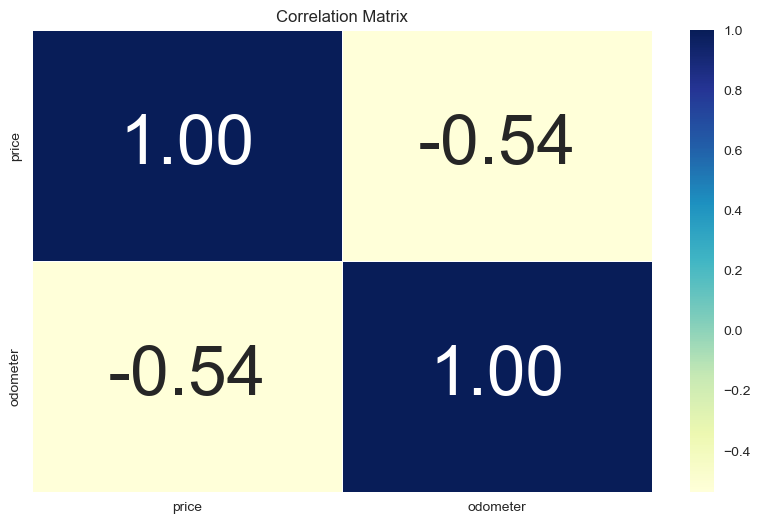

In [74]:
# Drop columns where any of the specified rows contain NaN values
df_temp_numeric = df_filled_empty_outliers_dyn.drop(["region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"], axis=1)

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu",
            annot=True)
plt.title('Correlation Matrix')
plt.show()

#### With dynamic median (group by manufacturer & year)

In [75]:
# Group by year & manufacturer
df_filled_empty_outliers_dyn1 = df_cleaned.copy()

##### Visualize price distribution 

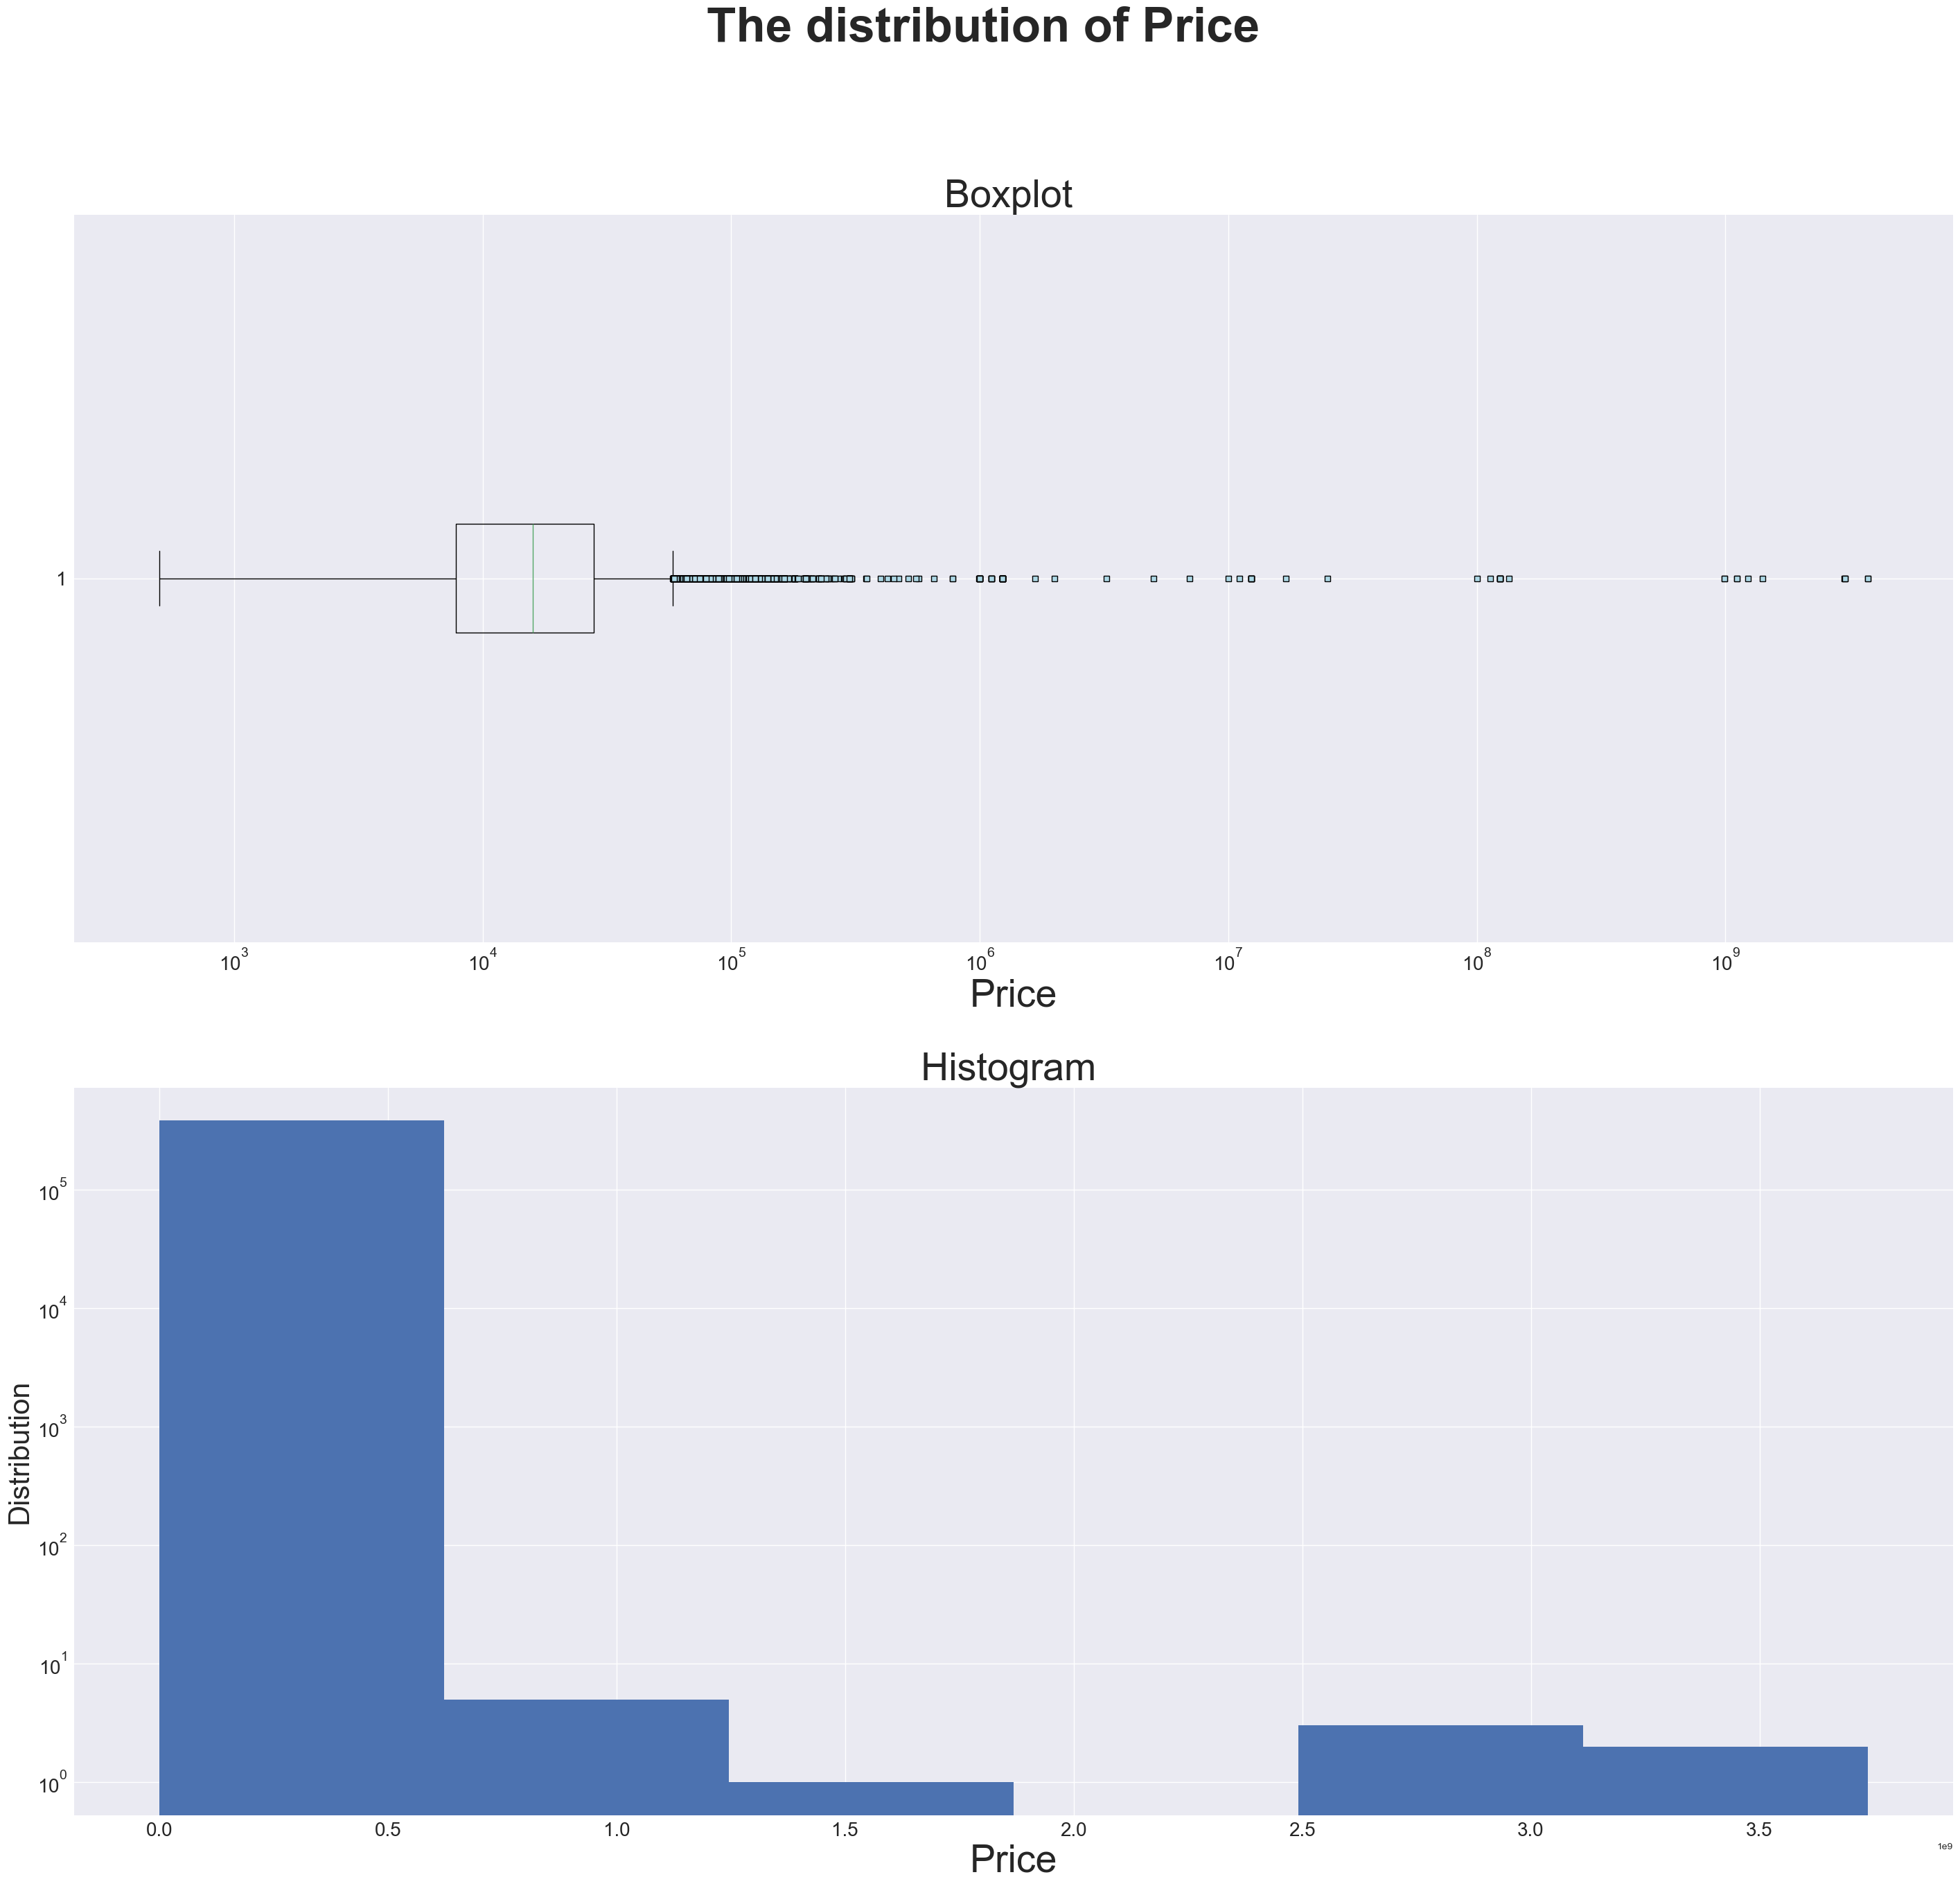

In [76]:
visualize_distribution(df_filled_empty_outliers_dyn1, "price", "Price", True)

##### Get price lower & upper bounds (Q0 & Q4)

In [77]:
lower_bound, upper_bound = calculate_numerical_quartiles("price", df_filled_empty_outliers_dyn1)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -22485.0, Q1: 7800.0, Median: 15900.0, Q3: 27990.0, Upper bound: 58275.0


In [78]:
# Group by manufacturer and year

# Fill NaN values in the 'manufacturer' column with a placeholder
df_filled_empty_outliers_dyn1['manufacturer'] = df_filled_empty_outliers_dyn1['manufacturer'].fillna('Unknown')

# Calculate median price for each manufacturer and year group
# median_price_per_group = df_filled_empty_outliers_dyn1.groupby(['manufacturer', 'year'])['price'].median()

median_price_per_group = df_filled_empty_outliers_dyn1.groupby(['manufacturer', 'year'])['price'].median().reset_index()
median_price_per_group = median_price_per_group.rename(columns={'price': 'median_price'})

# Merge the median prices back into the original dataframe
df_filled_empty_outliers_dyn1 = df_filled_empty_outliers_dyn1.merge(
    median_price_per_group, on=['manufacturer', 'year'], how='left'
)

# General median price
general_median_price = df_filled_empty_outliers_dyn1['price'].median()

# Function to replace outliers with the median value for each manufacturer and year group
def replace_outliers(row, column, lower_bound, upper_bound, general_median):
    if row[column] < lower_bound or row[column] > upper_bound:
        if row['median_price'] < lower_bound or row['median_price'] > upper_bound:
            return general_median
        else:
            return row['median_price']
    else:
        return row[column]

# Apply the function to replace outliers
df_filled_empty_outliers_dyn1['price'] = df_filled_empty_outliers_dyn1.apply(
    lambda row: replace_outliers(row, 'price', lower_bound, upper_bound, general_median_price), axis=1
)

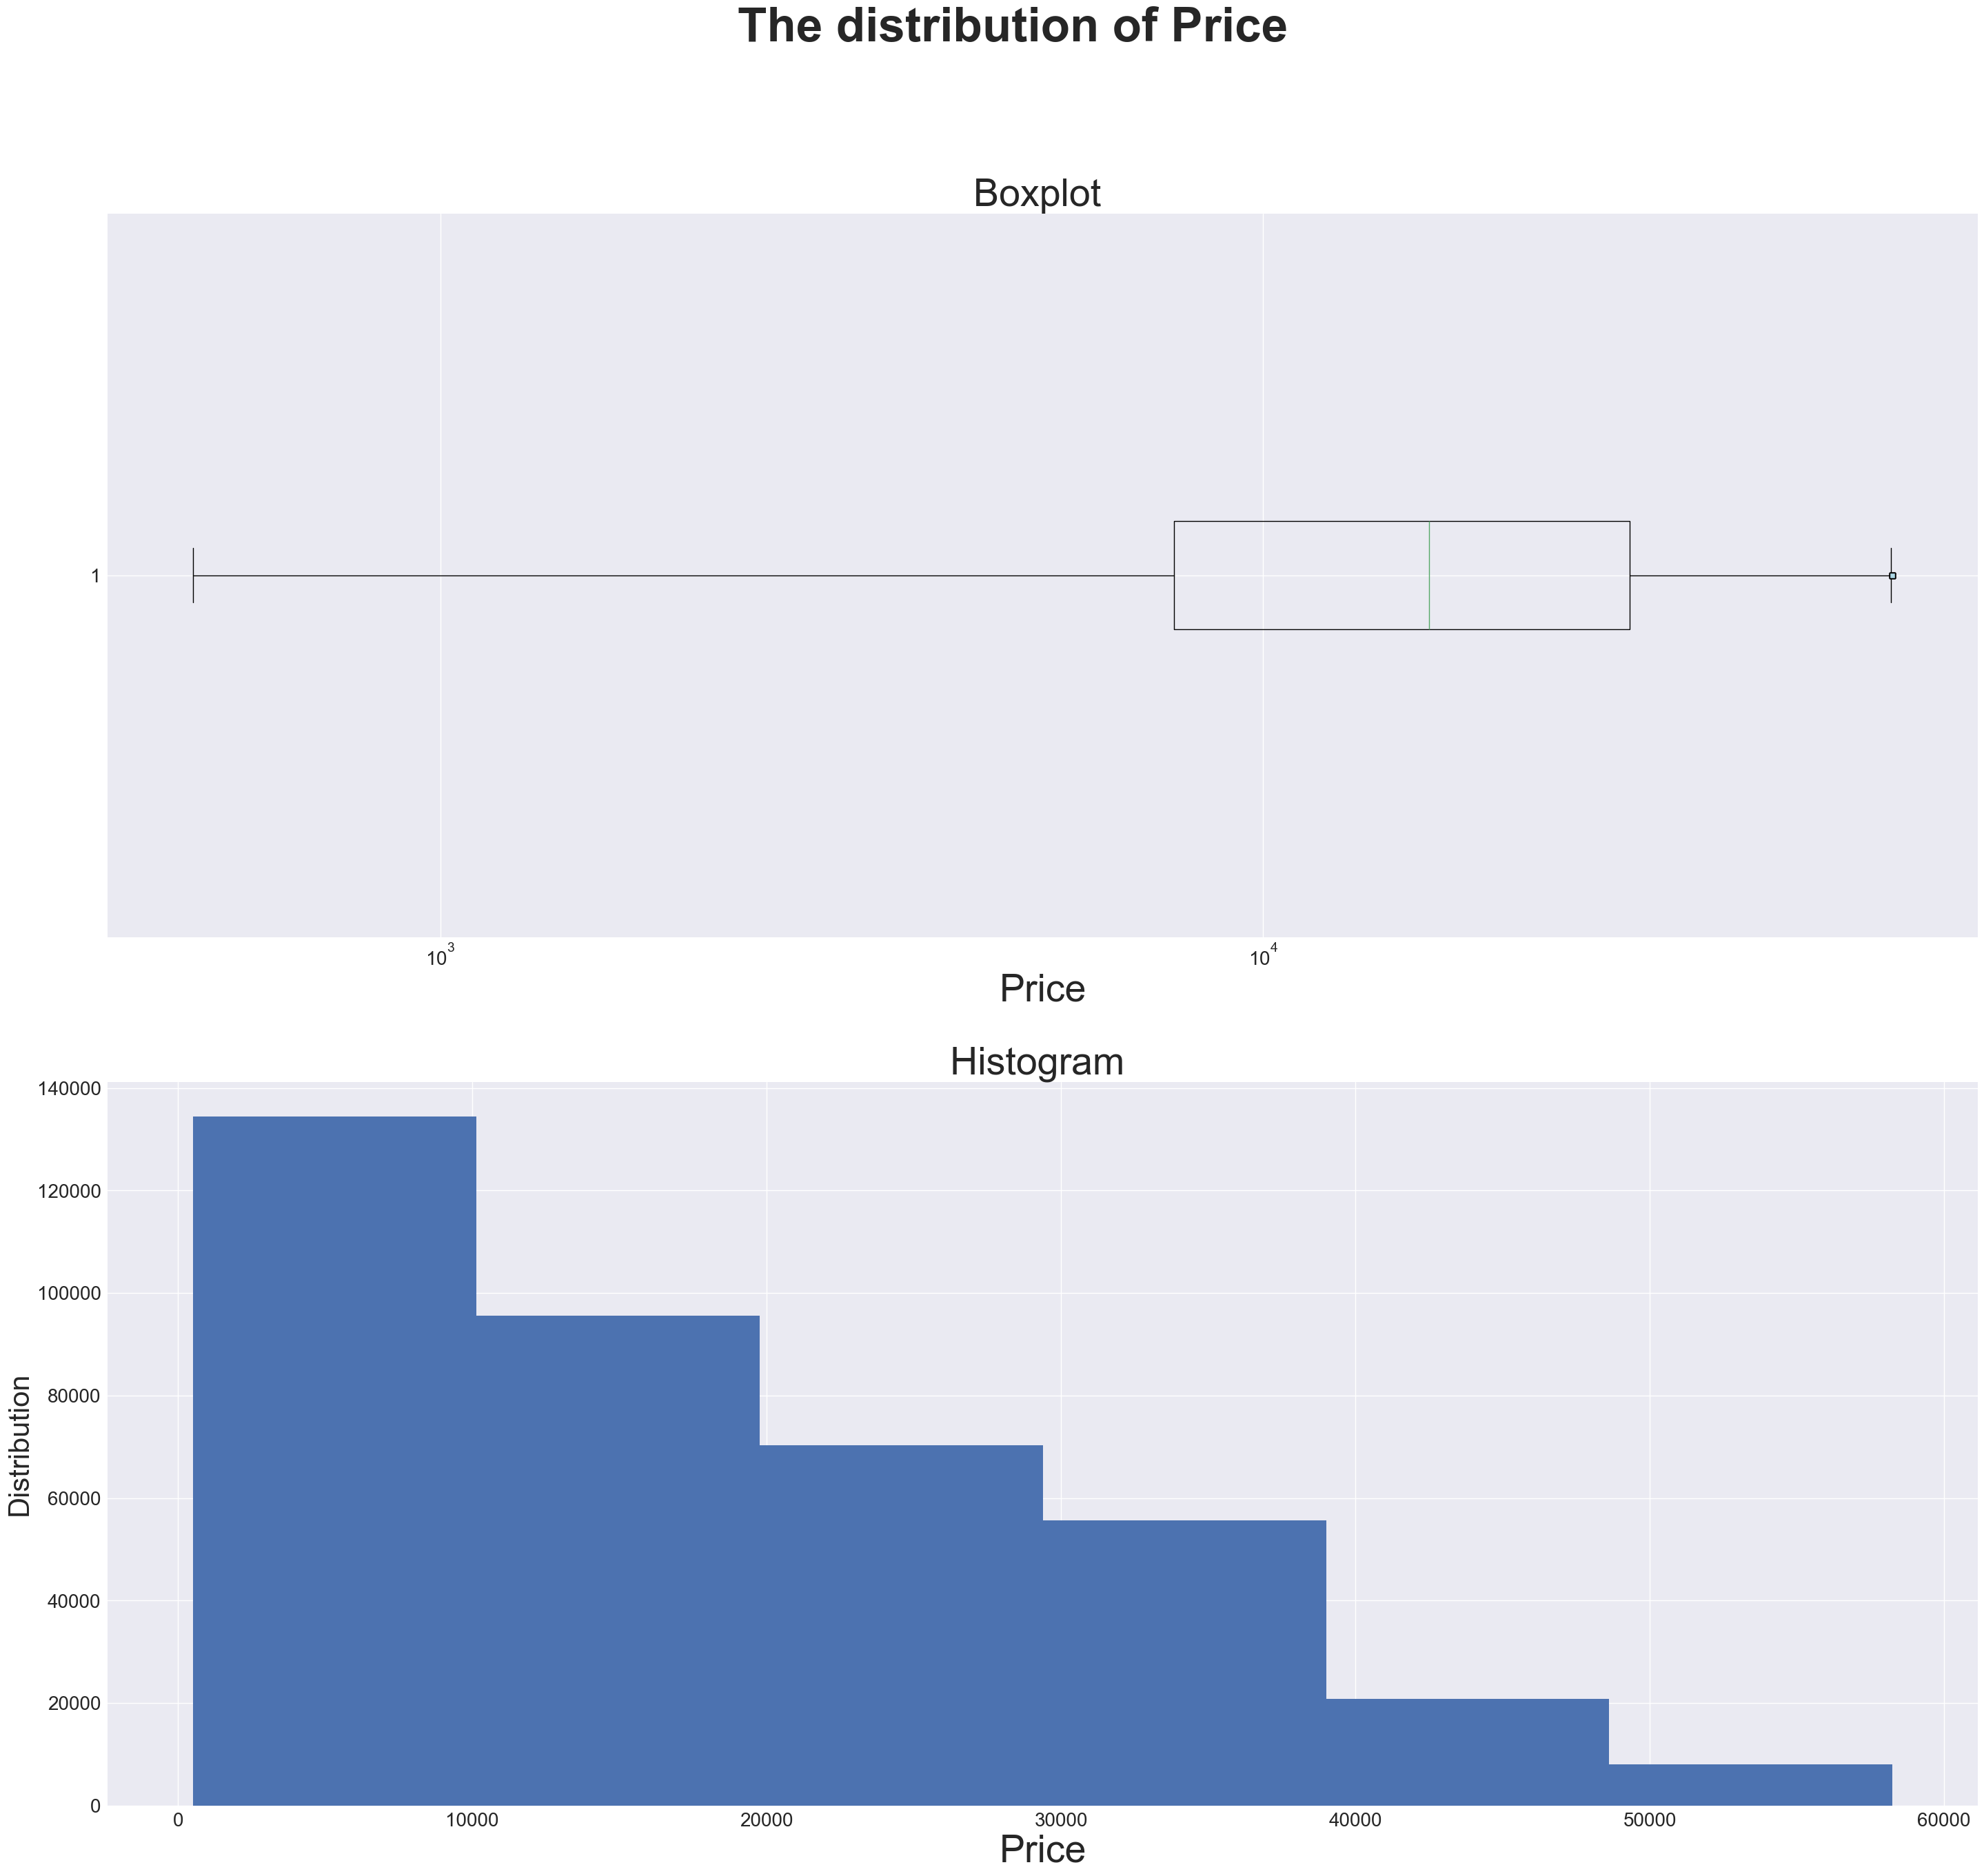

In [79]:
visualize_distribution(df_filled_empty_outliers_dyn1, "price", "Price", False)

##### Visualize odometer distribution 

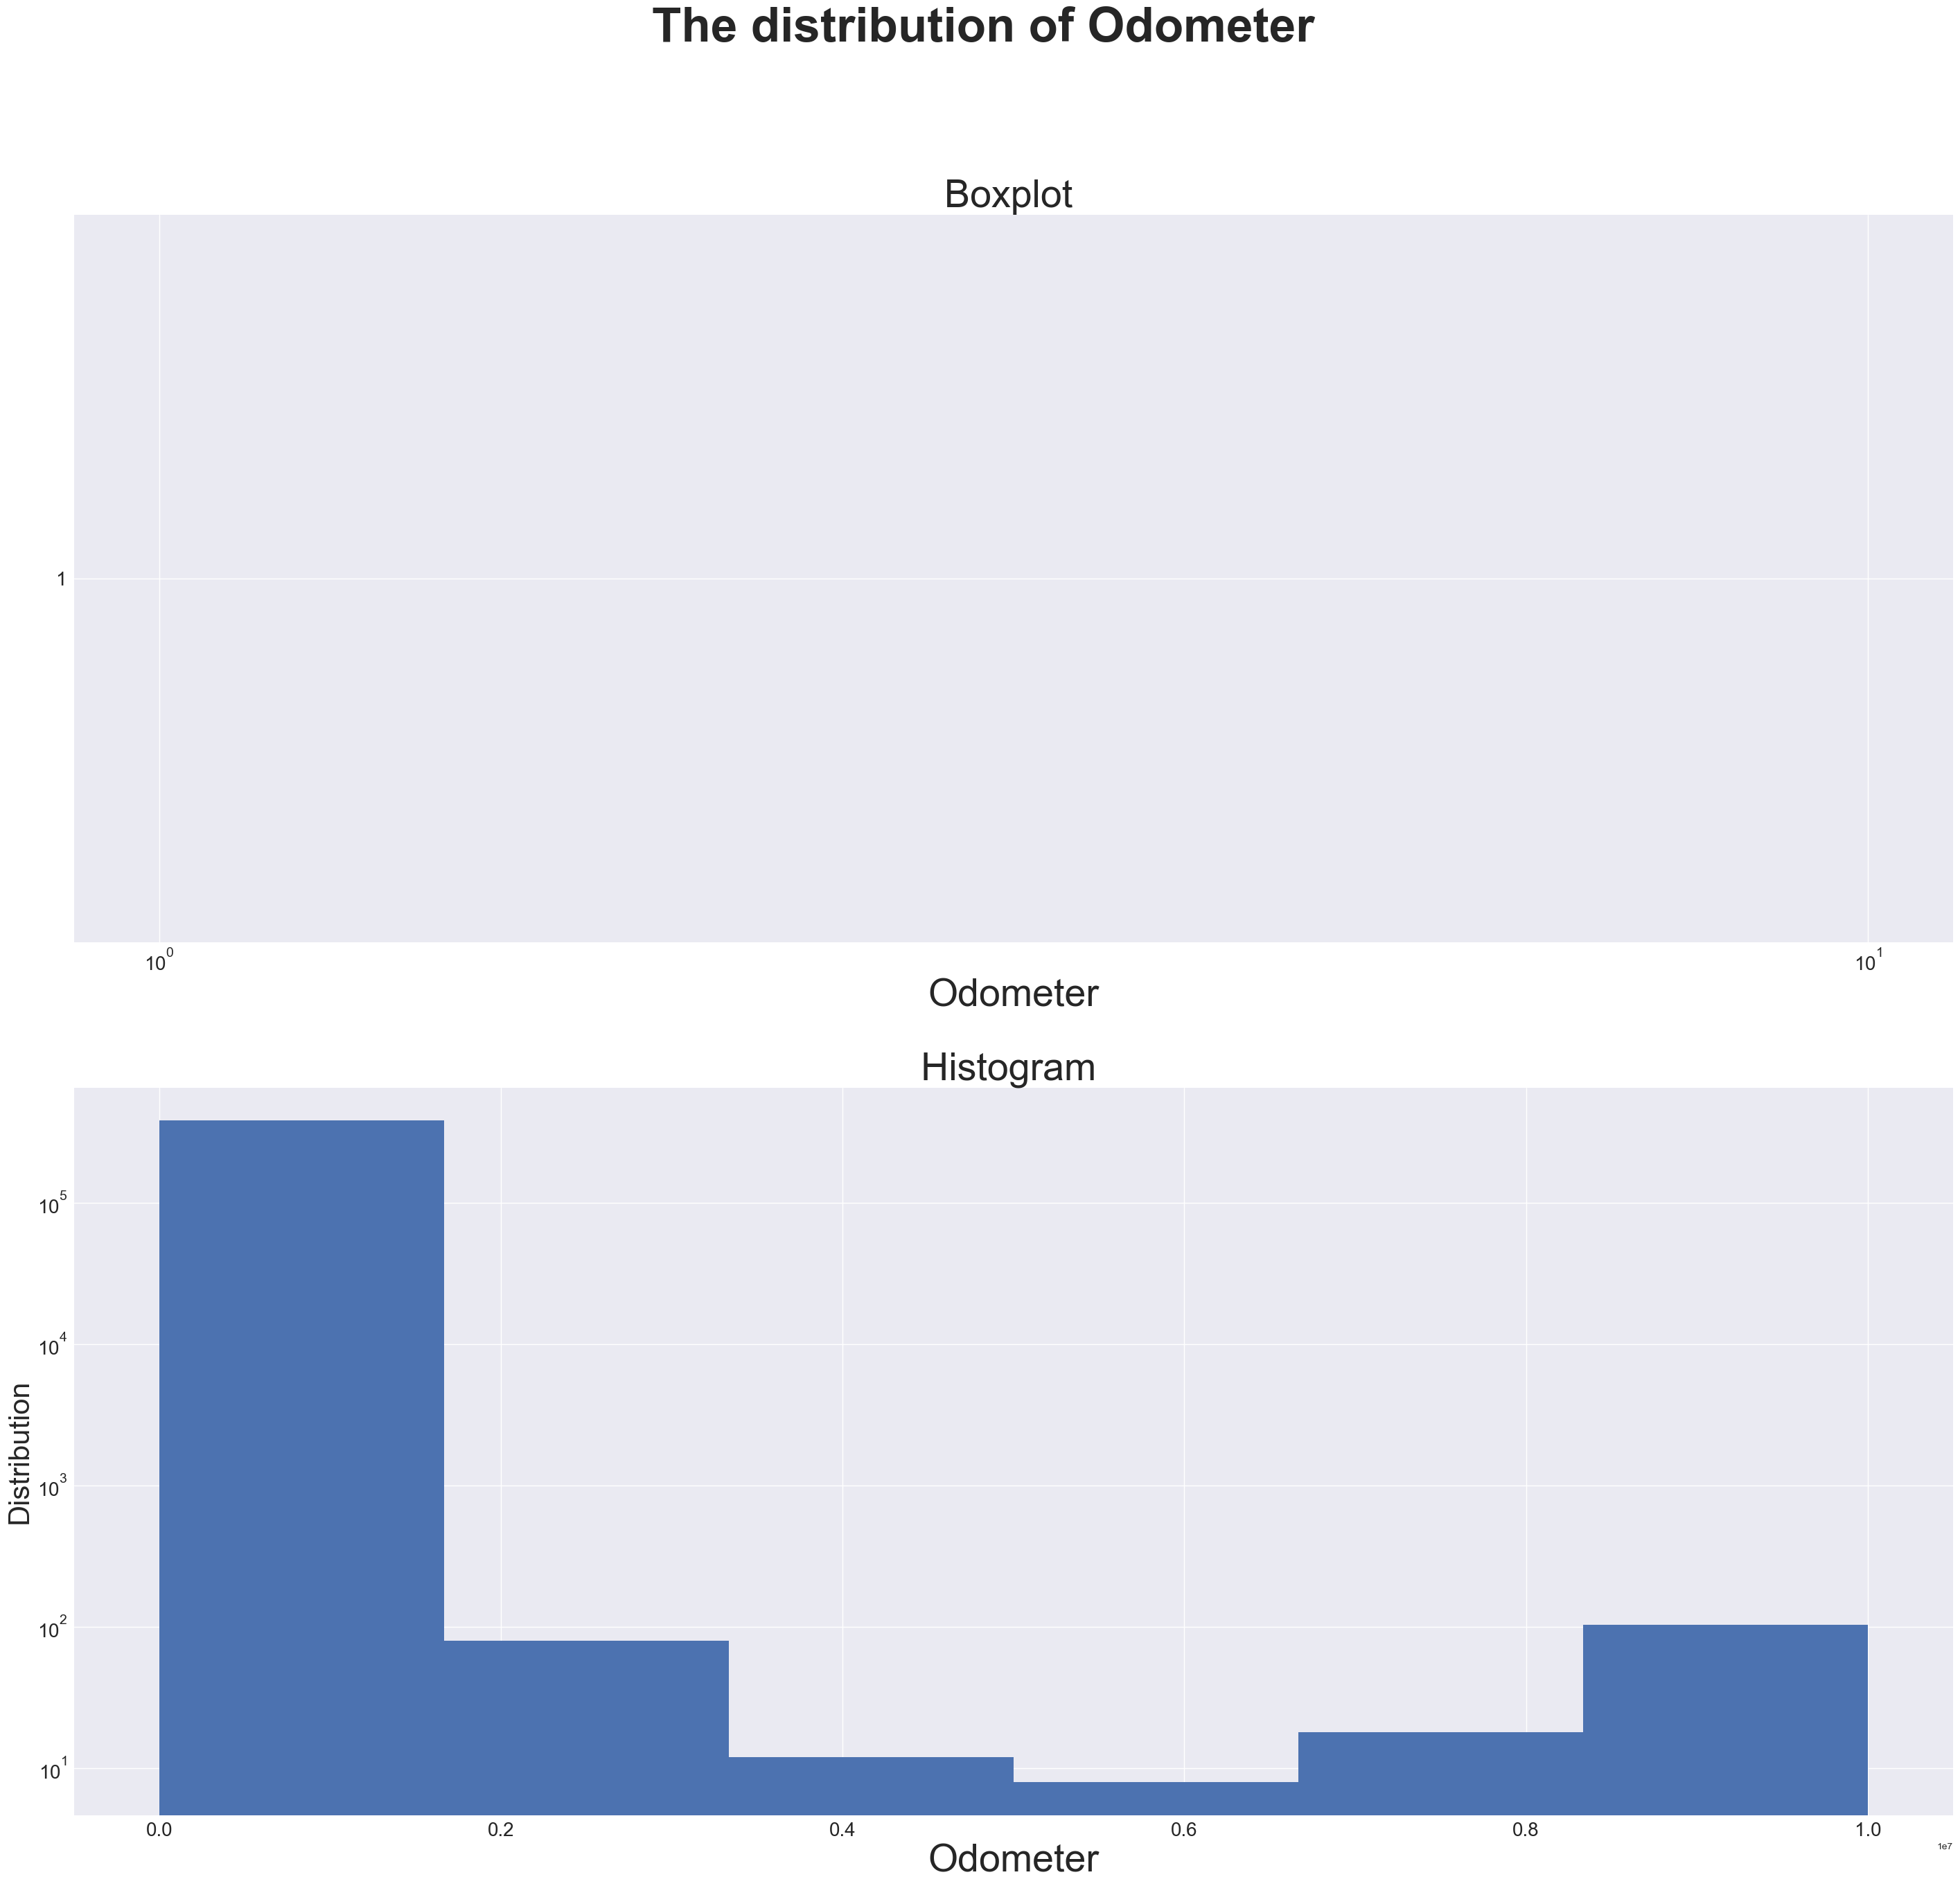

In [80]:
visualize_distribution(df_filled_empty_outliers_dyn1, "odometer", "Odometer", True)

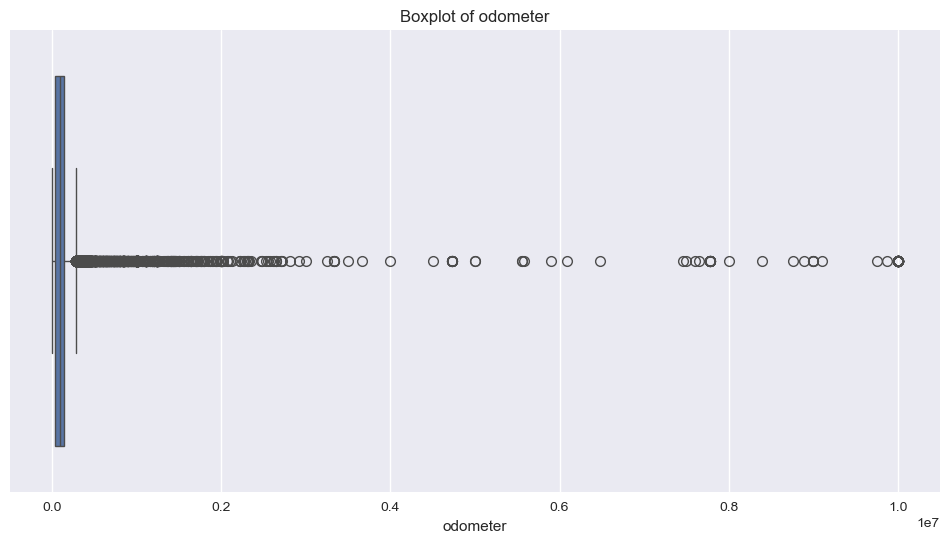

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers_dyn1['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Get price lower & upper bounds (Q0 & Q4)

In [82]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers_dyn1)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -108575.0, Q1: 38170.0, Median: 87684.0, Q3: 136000.0, Upper bound: 282745.0


In [83]:
df_filled_empty_outliers_dyn1

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,median_price
0,auburn,33590.0,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al,25990.0
1,auburn,22590.0,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al,10975.0
2,auburn,39590.0,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al,37990.0
3,auburn,30990.0,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al,24995.0
4,auburn,15000.0,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,14990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384719,wyoming,23590.0,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy,22590.0
384720,wyoming,30590.0,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy,35990.0
384721,wyoming,34990.0,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy,34990.0
384722,wyoming,28990.0,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy,33590.0


##### Fill odometer outliers & empty values with median

In [84]:
# Calculate the median
general_median_odometer = df_filled_empty_outliers_dyn1['odometer'].median()

# Fill NaN values in the 'manufacturer' column with a placeholder
df_filled_empty_outliers_dyn1['manufacturer'] = df_filled_empty_outliers_dyn1['manufacturer'].fillna('Unknown')

# Calculate median odometer for each manufacturer and year group
median_odometer_per_group = df_filled_empty_outliers_dyn1.groupby(['manufacturer', 'year'])['odometer'].median().reset_index()
median_odometer_per_group = median_odometer_per_group.rename(columns={'odometer': 'median_odometer'})

# Merge the median odometer values back into the original dataframe
df_filled_empty_outliers_dyn1 = df_filled_empty_outliers_dyn1.merge(
    median_odometer_per_group, on=['manufacturer', 'year'], how='left'
)

# Function to replace outliers & fill empty values with the median value for each manufacturer and year group
def replace_outliers_empty_val(row, column, lower_bound, upper_bound, general_median):
    if row[column] < lower_bound or row[column] > upper_bound or pd.isna(row[column]):
        # if median for a group is an outlier, general median is used
        if pd.isna(row['median_odometer']) or (row['median_odometer'] < lower_bound or row['median_odometer'] > upper_bound):
            return general_median
        else:
            return row['median_odometer']
    else:
        return row[column]

# Apply the function to replace outliers & fill empty values in the 'odometer' column
df_filled_empty_outliers_dyn1['odometer'] = df_filled_empty_outliers_dyn1.apply(
    lambda row: replace_outliers_empty_val(row, 'odometer', lower_bound, upper_bound, general_median_odometer), axis=1
)

In [85]:
df_filled_empty_outliers_dyn1[df_filled_empty_outliers_dyn1["median_odometer"] == None]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,median_price,median_odometer


In [86]:
# Import numpy if not already imported
import numpy as np

# Correct the code to filter rows where 'median_odometer' is NaN
df_filled_empty_outliers_dyn1[pd.isna(df_filled_empty_outliers_dyn1["median_odometer"])]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,median_price,median_odometer
141244,des moines,10000.0,1961,ram,100,NaN,NaN,gas,87684.0,clean,manual,NaN,NaN,pickup,NaN,ia,10000.0,NaN
194009,mankato,10000.0,1961,ram,100,NaN,NaN,gas,87684.0,clean,manual,NaN,NaN,pickup,NaN,mn,10000.0,NaN
194316,mankato,10000.0,1961,ram,100,NaN,NaN,gas,87684.0,clean,manual,NaN,NaN,pickup,NaN,mn,10000.0,NaN
196690,minneapolis / st paul,10000.0,1961,ram,100,NaN,NaN,gas,87684.0,clean,manual,NaN,NaN,pickup,NaN,mn,10000.0,NaN
197141,rochester,10000.0,1961,ram,100,NaN,NaN,gas,87684.0,clean,manual,NaN,NaN,pickup,NaN,mn,10000.0,NaN
197643,rochester,10000.0,1961,ram,100,NaN,NaN,gas,87684.0,clean,manual,NaN,NaN,pickup,NaN,mn,10000.0,NaN


In [87]:
df_filled_empty_outliers_dyn1.isna().sum()

region                  0
price                   0
year                    0
manufacturer            0
model                4509
condition          145613
cylinders          157091
fuel                 2532
odometer                0
title_status         6936
transmission         1757
drive              117220
size               276398
type                83163
paint_color        111590
state                   0
median_price            0
median_odometer         6
dtype: int64

##### Get price lower & upper bounds (Q0 & Q4)

In [88]:
lower_bound, upper_bound = calculate_numerical_quartiles("odometer", df_filled_empty_outliers_dyn1)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -107000.0, Q1: 38200.0, Median: 87410.0, Q3: 135000.0, Upper bound: 280200.0


##### Visualize odometer distribution 

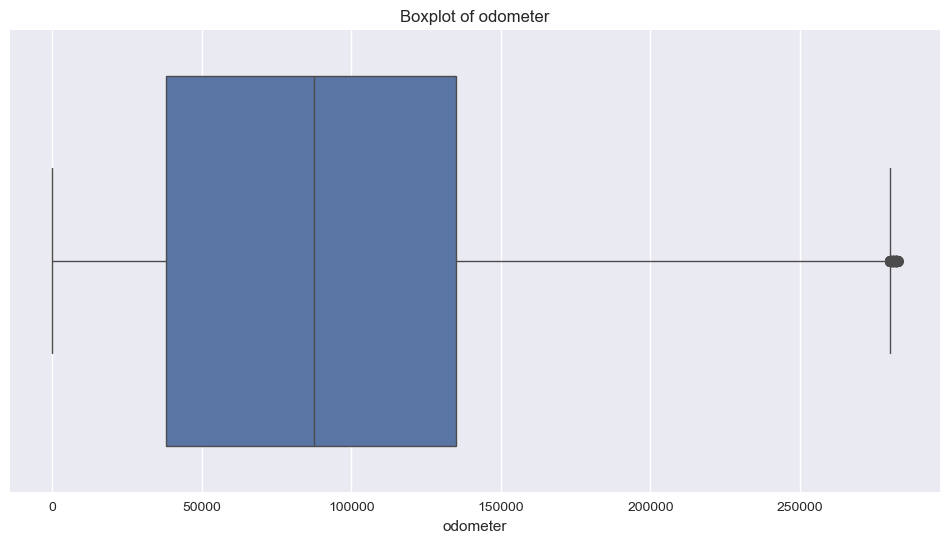

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filled_empty_outliers_dyn1['odometer'])
plt.title('Boxplot of odometer')
plt.xlabel('odometer')
plt.show()

##### Check dataframe

In [90]:
df_filled_empty_outliers_dyn1.head().T

,0,1,2,3,4
region,auburn,auburn,auburn,auburn,auburn
price,33590.0,22590.0,39590.0,30990.0,15000.0
year,2014,2010,2020,2017,2013
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders
fuel,gas,gas,gas,gas,gas
odometer,57923.0,71229.0,19160.0,41124.0,128000.0
title_status,clean,clean,clean,clean,clean


##### Check correlation

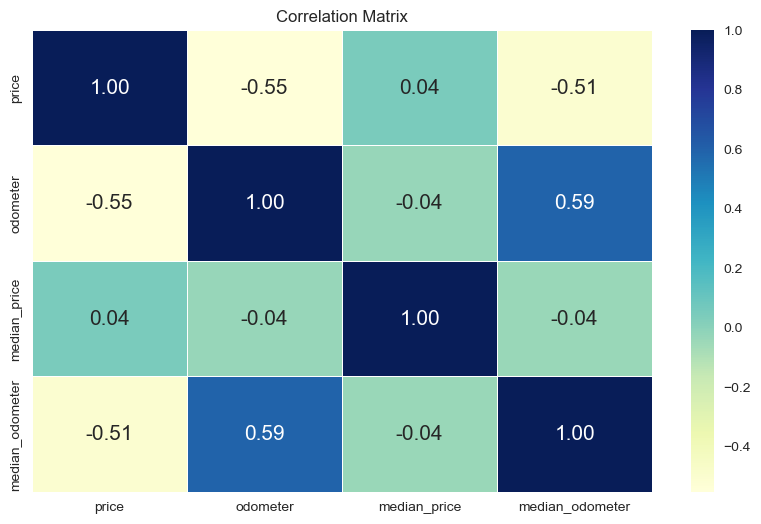

In [91]:
# Drop columns where any of the specified rows contain NaN values
df_temp_numeric = df_filled_empty_outliers_dyn1.drop(["region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"], axis=1)

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu",
            annot=True,
            annot_kws={"size": 15})
plt.title('Correlation Matrix')
plt.show()

### Drop empty values and outliers

In [93]:
df_dropped_empty_outliers = df_cleaned.copy()

In [94]:
df_dropped_empty_outliers

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy
426876,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy
426877,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy
426878,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy


##### Get price lower & upper bounds (Q0 & Q4)

In [95]:
lower_bound_price, upper_bound_price = calculate_numerical_quartiles("price", df_dropped_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -22485.0, Q1: 7800.0, Median: 15900.0, Q3: 27990.0, Upper bound: 58275.0


In [96]:
lower_bound_odometer, upper_bound_odometer = calculate_numerical_quartiles("odometer", df_dropped_empty_outliers)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for odometer:
Lower bound: -108575.0, Q1: 38170.0, Median: 87684.0, Q3: 136000.0, Upper bound: 282745.0


In [97]:
# Fill NaN values in the 'manufacturer' column with a placeholder
df_dropped_empty_outliers['manufacturer'] = df_dropped_empty_outliers['manufacturer'].fillna('Unknown')

# Drop rows where 'price' or 'odometer' is an outlier
df_dropped_empty_outliers = df_dropped_empty_outliers[
    (df_dropped_empty_outliers['price'] >= lower_bound_price) & (df_dropped_empty_outliers['price'] <= upper_bound_price) &
    (df_dropped_empty_outliers['odometer'] >= lower_bound_odometer) & (df_dropped_empty_outliers['odometer'] <= upper_bound_odometer)
]

In [98]:
df_dropped_empty_outliers

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy
426876,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy
426877,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy
426878,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy


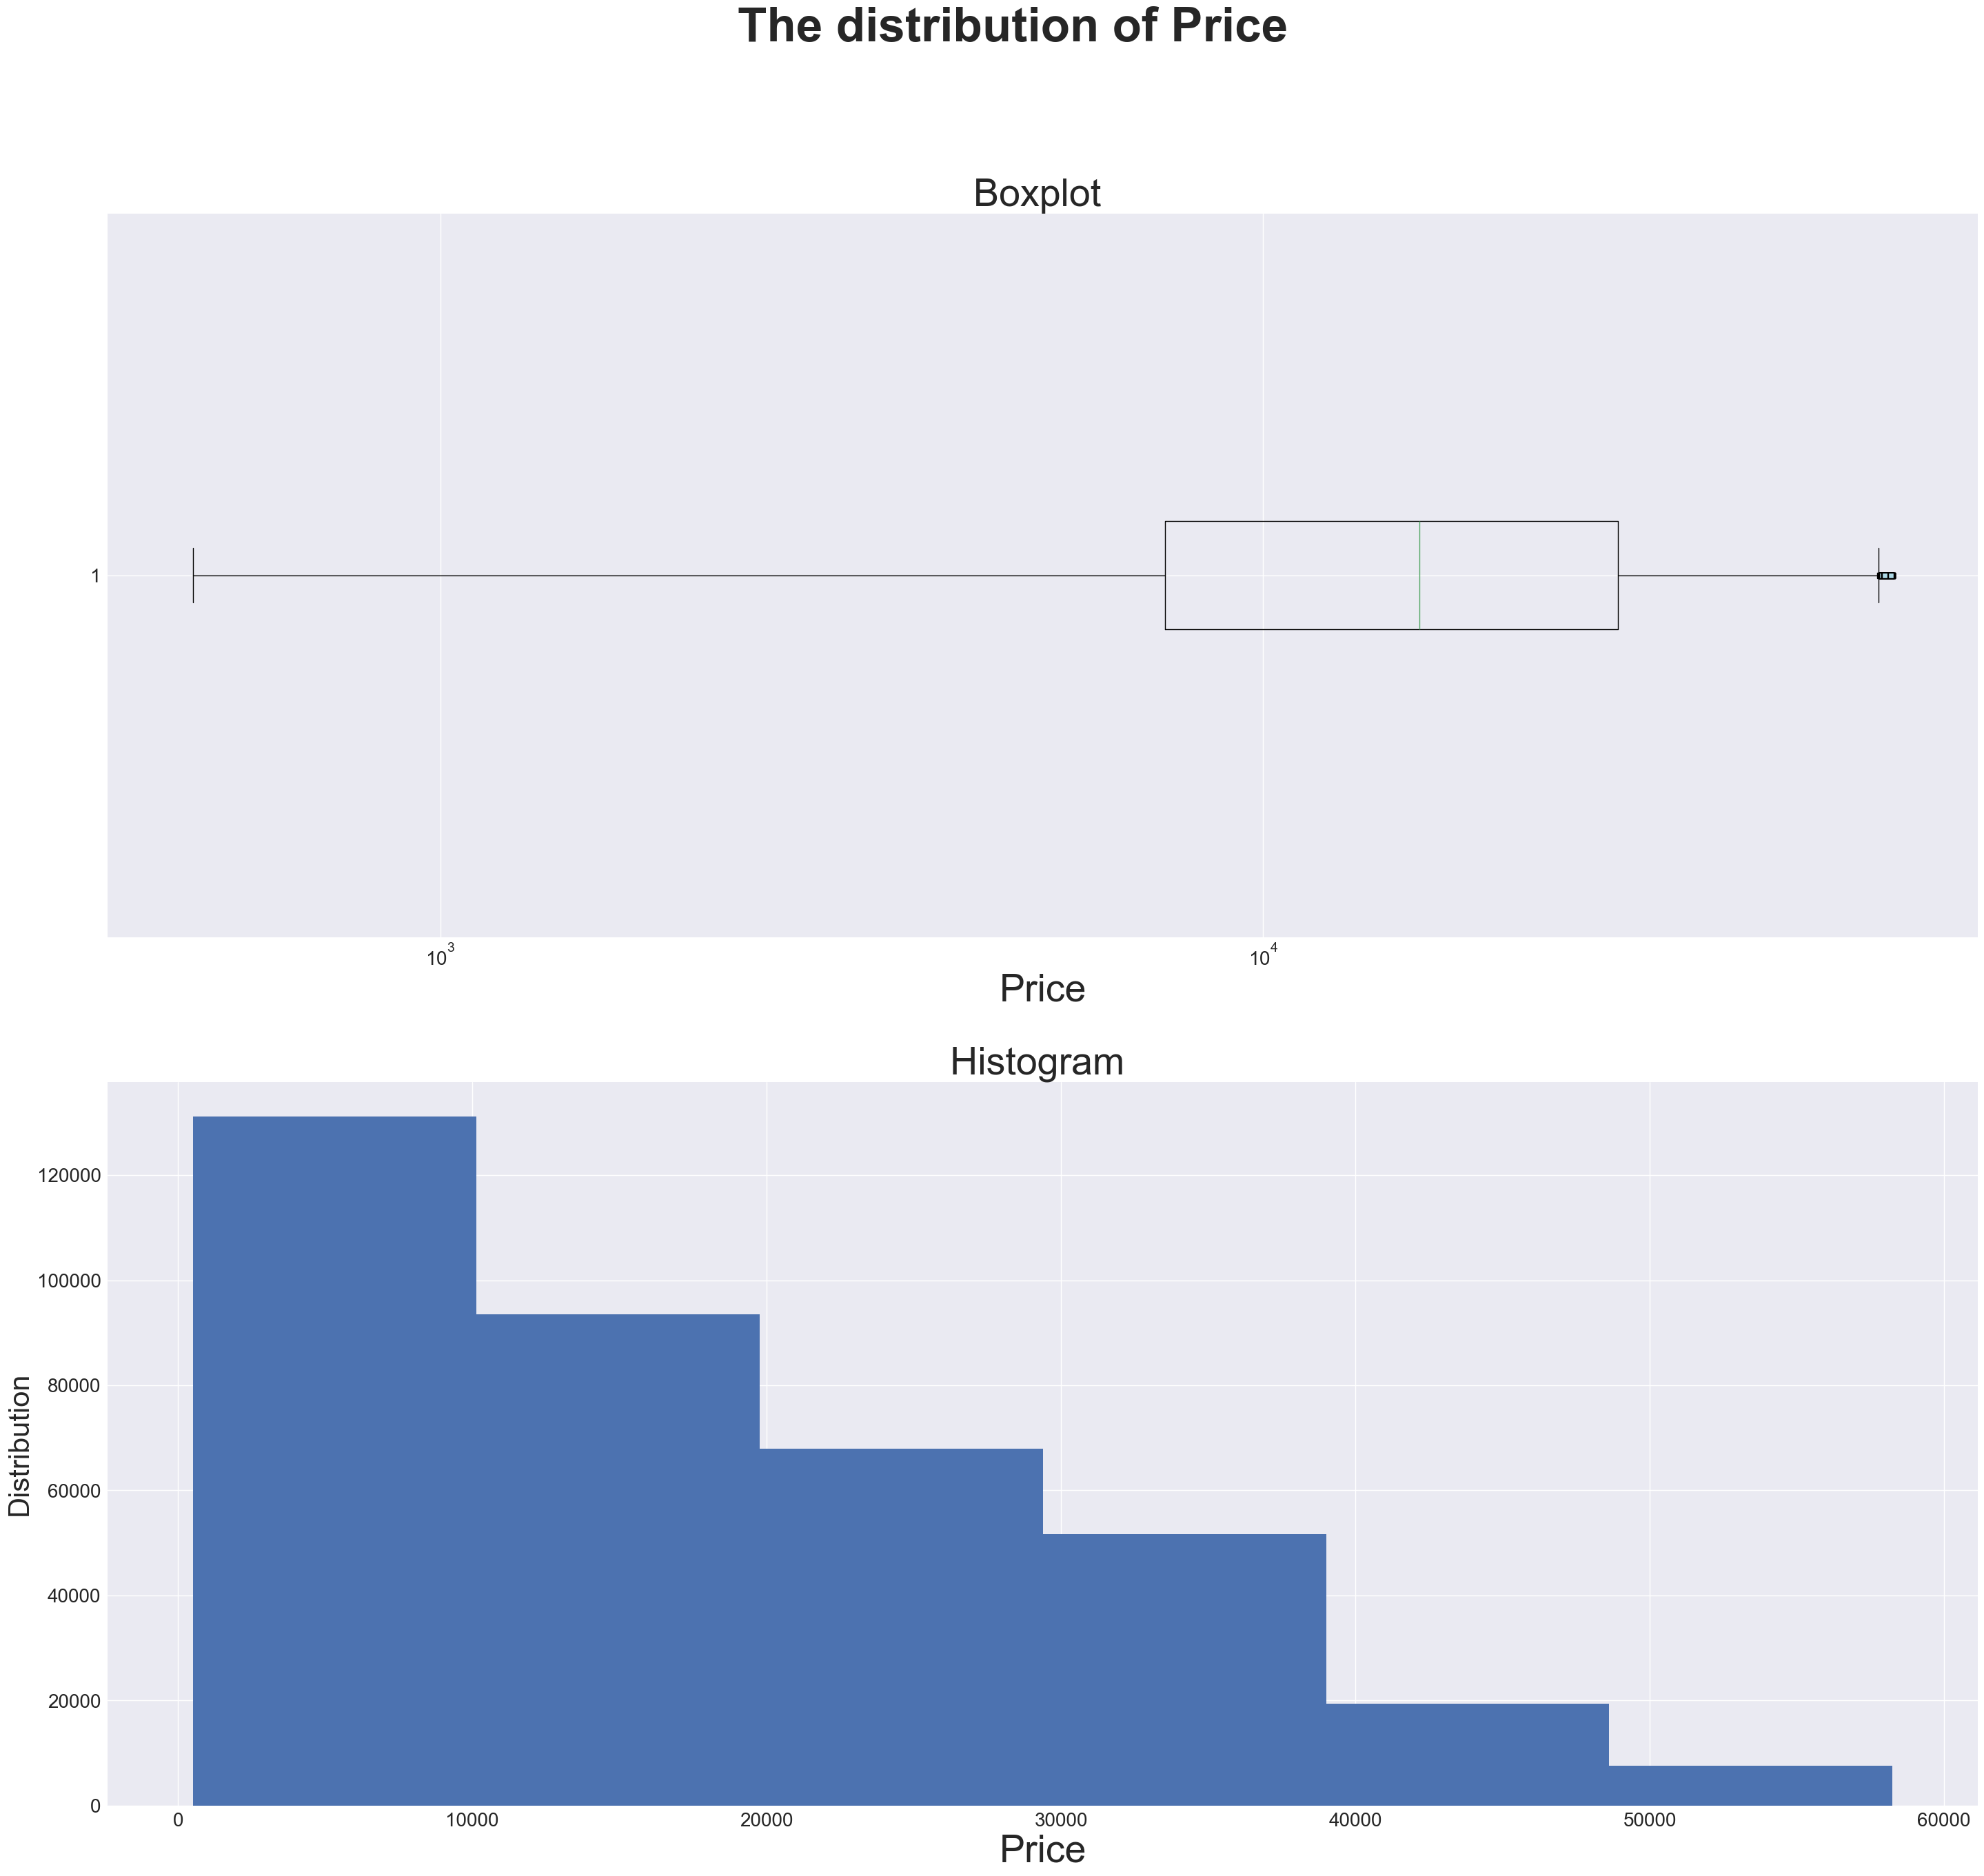

In [99]:
visualize_distribution(df_dropped_empty_outliers, "price", "Price", False)

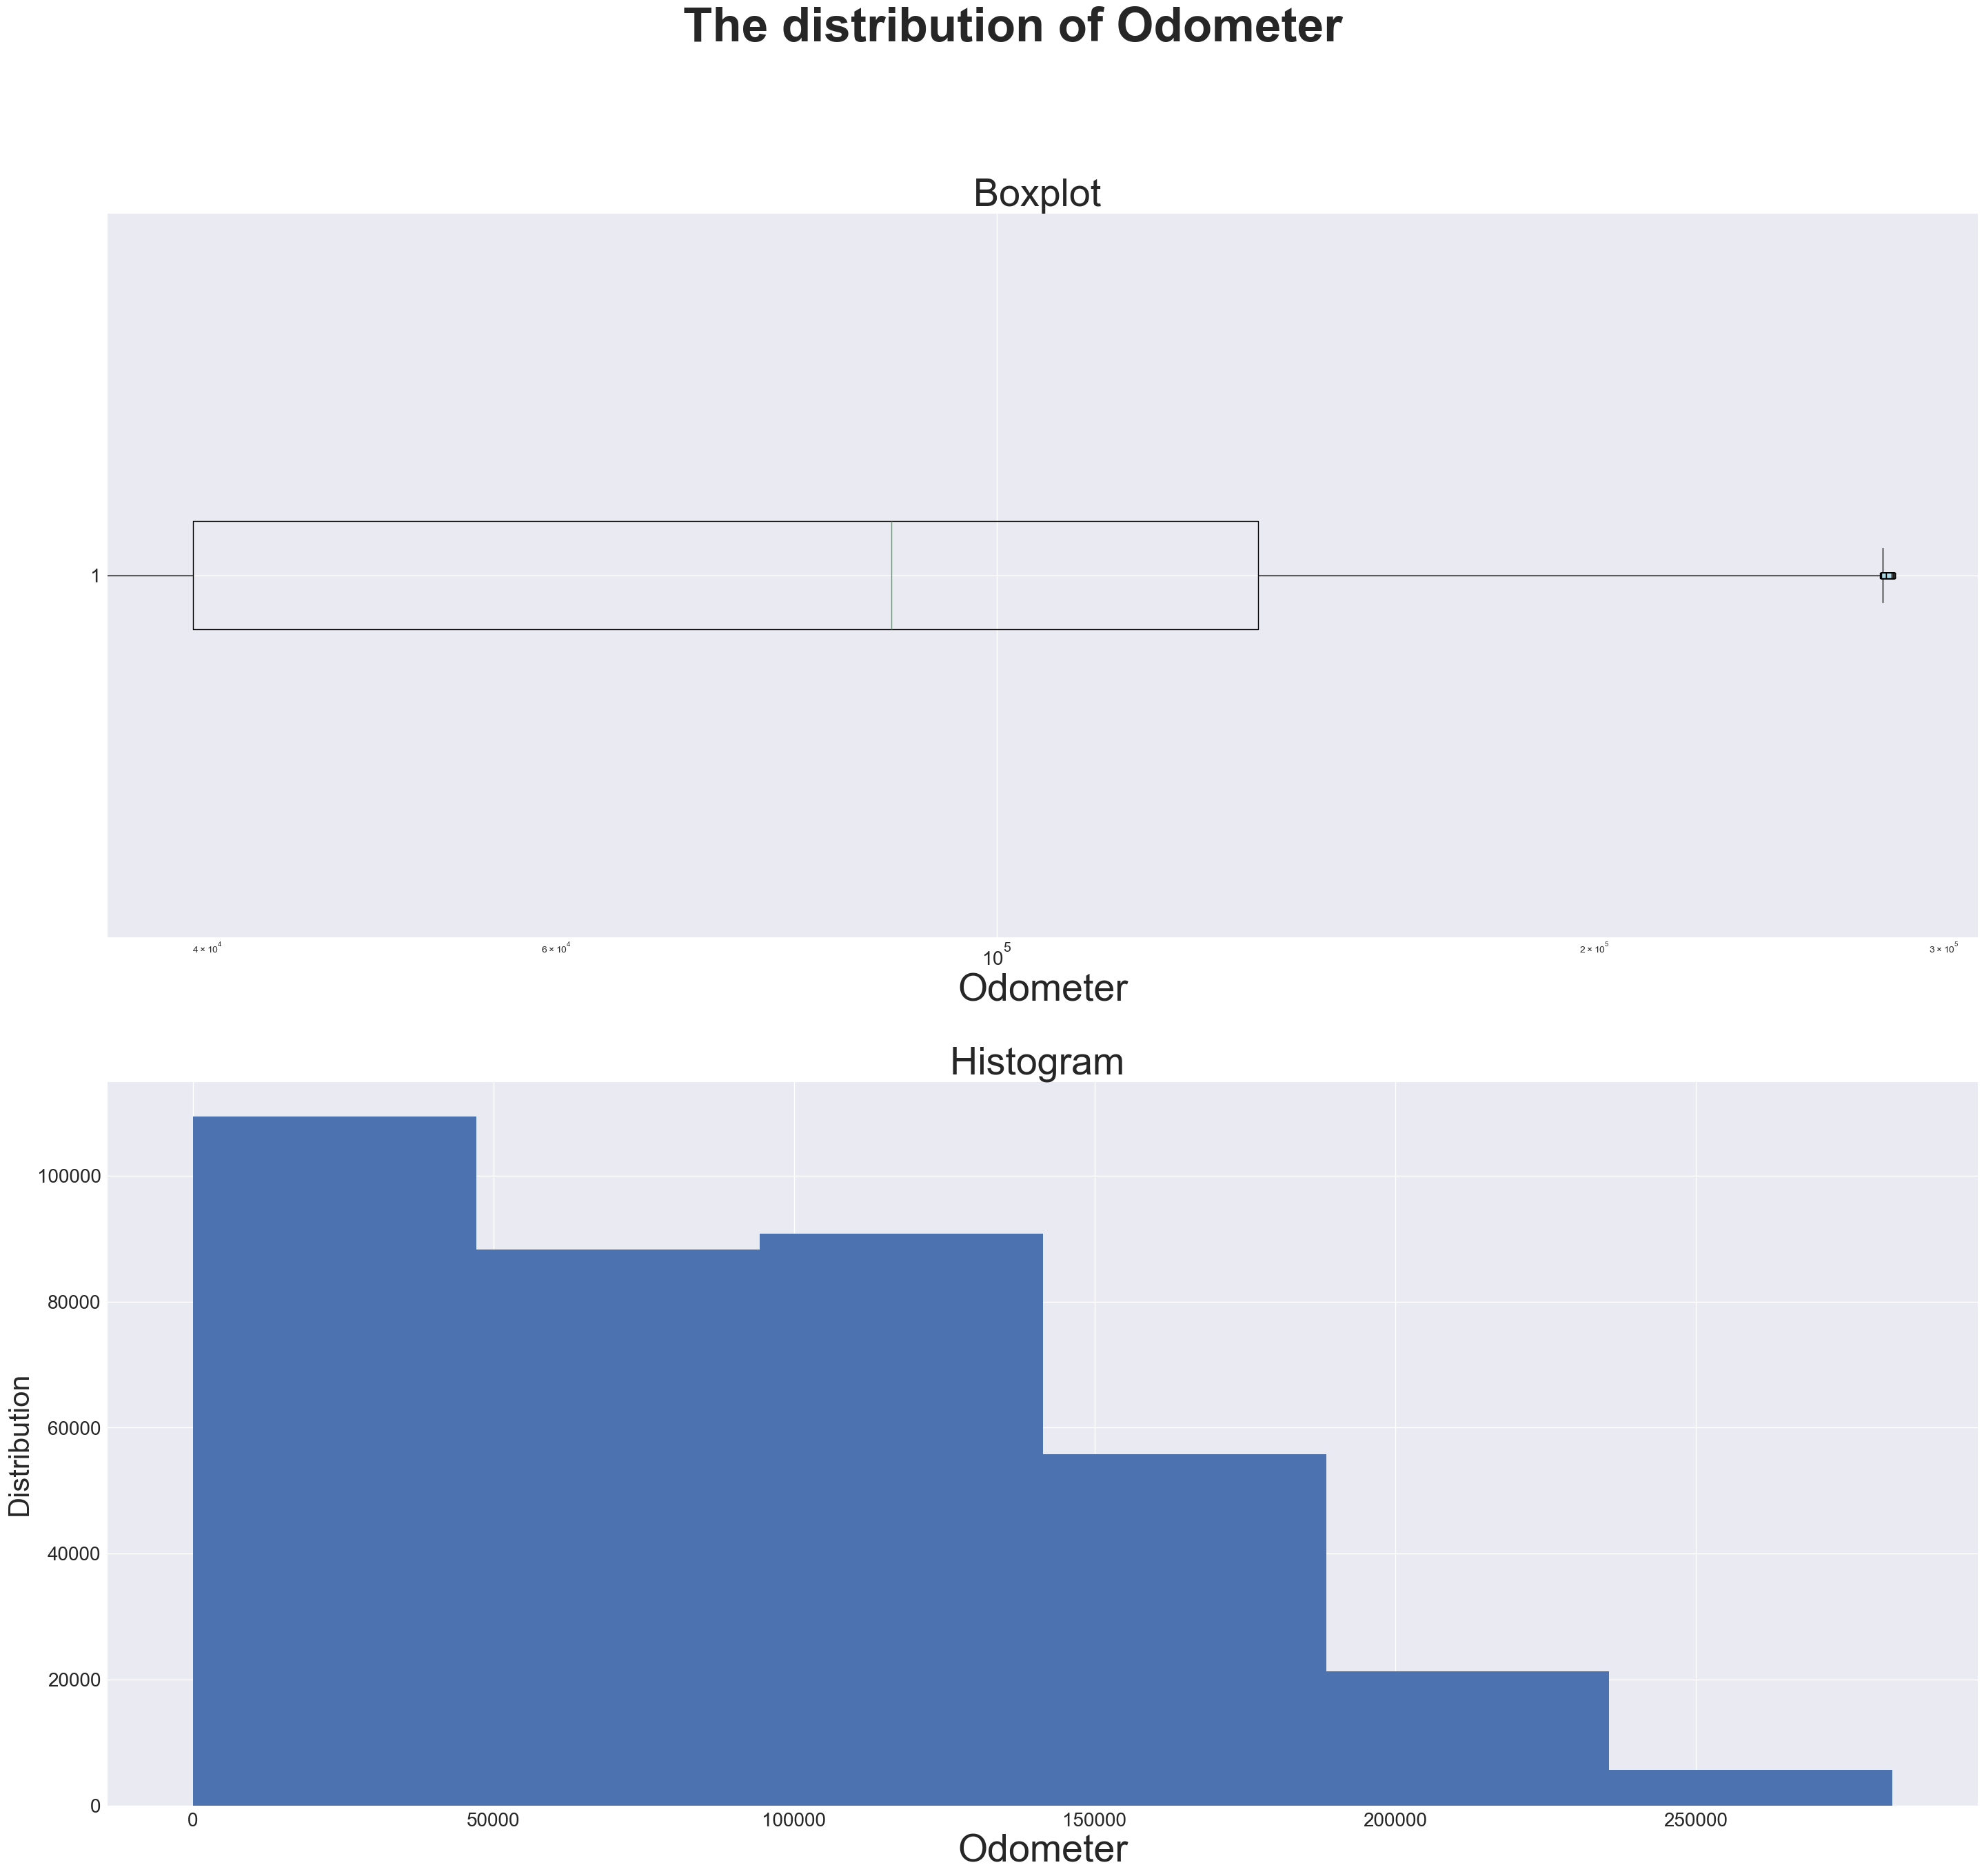

In [100]:
visualize_distribution(df_dropped_empty_outliers, "odometer", "Odometer", False)

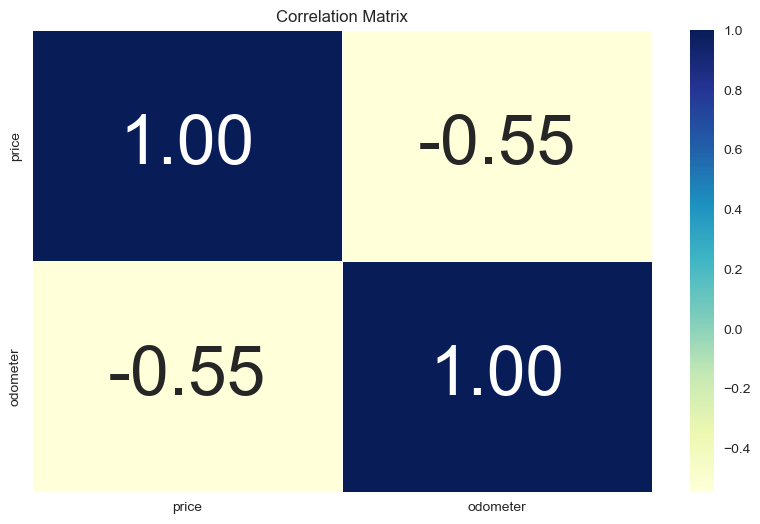

In [101]:
# Drop columns where any of the specified rows contain NaN values
df_temp_numeric = df_dropped_empty_outliers.drop(["region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"], axis=1)

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu",
            annot=True)
plt.title('Correlation Matrix')
plt.show()

### Take cars with manufacture year > 2010

In [102]:
# Check unique values in the 'year' column
unique_years = df_dropped_empty_outliers['year'].unique()

# Print the unique values
print(unique_years)


['2014' '2010' '2020' '2017' '2013' '2012' '2016' '2019' '2011' '1992'
 '2018' '2004' '2015' '2001' '2006' '1968' '2003' '2008' '2007' '2005'
 '1966' '2009' '1998' '2002' '' '1999' '2021' '1997' '1976' '1969' '1995'
 '1978' '1954' '1979' '1970' '1974' '1996' '1987' '2000' '1955' '1991'
 '1972' '1988' '1994' '1984' '1986' '1989' '1973' '1946' '1958' '1937'
 '1985' '1957' '1953' '1942' '1963' '1977' '1993' '1990' '1965' '1982'
 '1948' '1983' '1936' '1932' '1951' '1931' '1980' '1971' '1947' '1967'
 '1981' '1926' '1962' '1975' '1964' '1933' '1934' '1952' '1940' '1950'
 '1930' '1960' '1959' '1922' '1928' '2022' '1901' '1941' '1929' '1956'
 '1924' '1927' '1939' '1923' '1949' '1961' '1935' '1918' '1938' '1900'
 '1916' '1943' '1925' '1921' '1915' '1945' '1905' '1920' '1944' '1910']


In [103]:
# Convert 'year' column to integer, errors='coerce' will convert non-convertible values to NaN
df_dropped_empty_outliers['year'] = pd.to_numeric(df_dropped_empty_outliers['year'], errors='coerce')

# Drop rows with NaN in 'year' after conversion
df_dropped_empty_outliers.dropna(subset=['year'], inplace=True)

# Convert 'year' column to integer after dropping NaNs
df_dropped_empty_outliers['year'] = df_dropped_empty_outliers['year'].astype(int)

# Filter the DataFrame for rows where year is 2000 or above
df_2010_filtered = df_dropped_empty_outliers[df_dropped_empty_outliers['year'] >= 2010]

C:\Users\omara\AppData\Local\Temp\ipykernel_31636\3502057407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_empty_outliers['year'] = pd.to_numeric(df_dropped_empty_outliers['year'], errors='coerce')
C:\Users\omara\AppData\Local\Temp\ipykernel_31636\3502057407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_empty_outliers.dropna(subset=['year'], inplace=True)
C:\Users\omara\AppData\Local\Temp\ipykernel_31636\3502057407.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [104]:
df_2010_filtered

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy
426876,wyoming,30590,2020,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy
426877,wyoming,34990,2020,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy
426878,wyoming,28990,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy


In [105]:
# Convert the 'year' column to string
df_2010_filtered['year'] = df_2010_filtered['year'].astype(str)

# Display the DataFrame to verify the changes
df_2010_filtered

         region  price  year manufacturer                     model  \
27       auburn  33590  2014          gmc  sierra 1500 crew cab slt   
28       auburn  22590  2010    chevrolet            silverado 1500   
29       auburn  39590  2020    chevrolet       silverado 1500 crew   
30       auburn  30990  2017       toyota      tundra double cab sr   
31       auburn  15000  2013         ford                 f-150 xlt   
...         ...    ...   ...          ...                       ...   
426875  wyoming  23590  2019       nissan         maxima s sedan 4d   
426876  wyoming  30590  2020        volvo  s60 t5 momentum sedan 4d   
426877  wyoming  34990  2020     cadillac          xt4 sport suv 4d   
426878  wyoming  28990  2018        lexus           es 350 sedan 4d   
426879  wyoming  30590  2019          bmw  4 series 430i gran coupe   

        condition    cylinders    fuel  odometer title_status transmission  \
27           good  8 cylinders     gas   57923.0        clean        

C:\Users\omara\AppData\Local\Temp\ipykernel_31636\1271579984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2010_filtered['year'] = df_2010_filtered['year'].astype(str)


In [106]:
# Check if there is any non numerical values
for label, content in df_2010_filtered.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

region
year
manufacturer
model
condition
cylinders
fuel
title_status
transmission
drive
size
type
paint_color
state


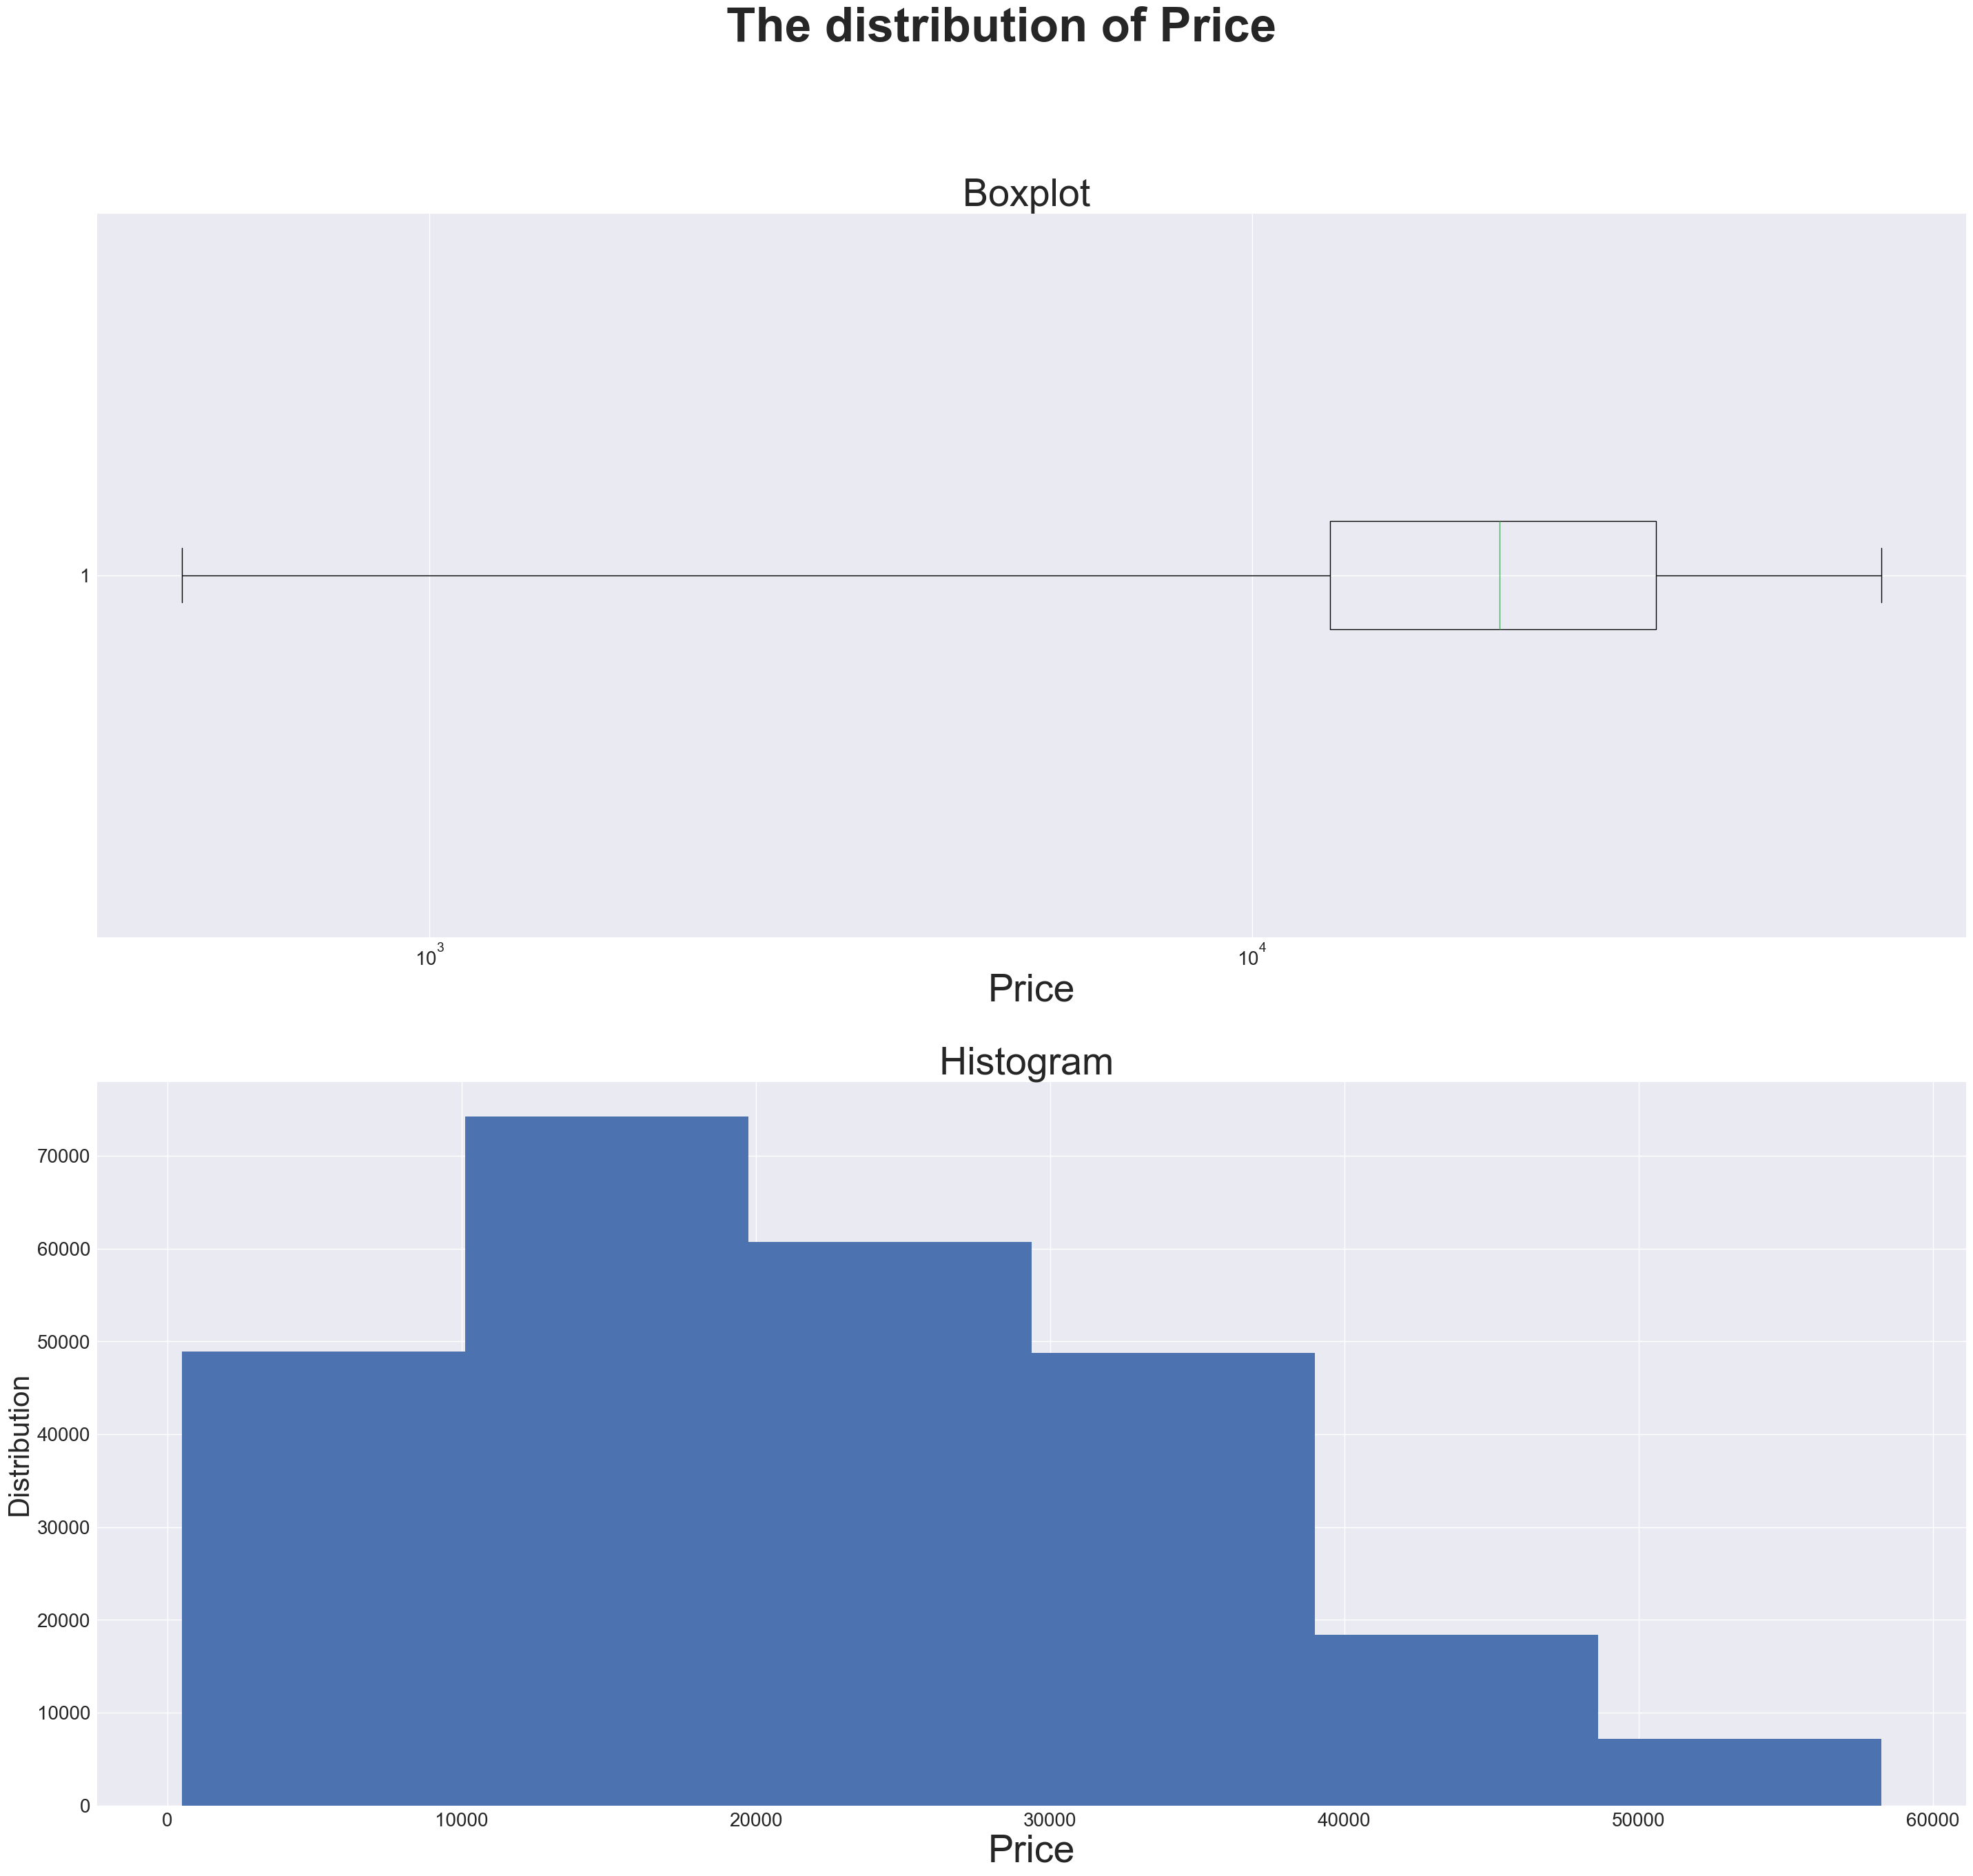

In [107]:
visualize_distribution(df_2010_filtered, "price", "Price", False)

##### Get price lower & upper bounds (Q0 & Q4)

In [108]:
lower_bound, upper_bound = calculate_numerical_quartiles("price", df_2010_filtered)

Below are the Q1, Q2 (median), & Q3 values:
Q1 (First Quartile): represents the lower quartile, 25% of the data points are less than or equal to Q1
Q2 (Median): represents the middle quartile, dividing the dataset into two equal parts
Q3 (Third Quartile): represents the upper quartile, 75% of the data points are less than or equal to Q3

Distribution for price:
Lower bound: -15360.0, Q1: 12450.0, Median: 20000.0, Q3: 30990.0, Upper bound: 58800.0


#### Turn categorical values into numbers & fill empty values

##### Check empty values

In [109]:
df_filled_empty_outliers_dyn.isna().sum()

region               0
price                0
year                 0
manufacturer         0
model             4509
condition       145613
cylinders       157091
fuel              2532
odometer             0
title_status      6936
transmission      1757
drive           117220
size            276398
type             83163
paint_color     111590
state                0
dtype: int64

In [110]:
# percentage of empty values
np.round(df_filled_empty_outliers_dyn.isnull().sum()/len(df_filled_empty_outliers_dyn)*100)

region           0.0
price            0.0
year             0.0
manufacturer     0.0
model            1.0
condition       38.0
cylinders       41.0
fuel             1.0
odometer         0.0
title_status     2.0
transmission     0.0
drive           30.0
size            72.0
type            22.0
paint_color     29.0
state            0.0
dtype: float64

##### Check if there is any non numerical columns

In [111]:
# Check if there is any non numerical values
for label, content in df_filled_empty_outliers_dyn.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

region
year
manufacturer
model
condition
cylinders
fuel
title_status
transmission
drive
size
type
paint_color
state


##### Turn categorical variables into numbers and fill missing

In [112]:
# Turn categorical variables into numbers and fill missing in df_dropped_empty_outliers
for label, content in df_dropped_empty_outliers.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add 1
        df_dropped_empty_outliers[label] = pd.Categorical(content).codes + 1

# Turn categorical variables into numbers and fill missing in df_filled_empty_outliers
for label, content in df_filled_empty_outliers.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add 1
        df_filled_empty_outliers[label] = pd.Categorical(content).codes + 1

# Turn categorical variables into numbers and fill missing in df_filled_empty_outliers_dyn
for label, content in df_filled_empty_outliers_dyn.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add 1
        df_filled_empty_outliers_dyn[label] = pd.Categorical(content).codes + 1

# Turn categorical variables into numbers and fill missing in df_filled_empty_outliers_dyn1
for label, content in df_filled_empty_outliers_dyn1.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add 1
        df_filled_empty_outliers_dyn1[label] = pd.Categorical(content).codes + 1

# Turn categorical variables into numbers and fill missing in df_2010_filtered
for label, content in df_2010_filtered.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add 1
        df_2010_filtered[label] = pd.Categorical(content).codes + 1

C:\Users\omara\AppData\Local\Temp\ipykernel_31636\2222905235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_empty_outliers[label] = pd.Categorical(content).codes + 1
C:\Users\omara\AppData\Local\Temp\ipykernel_31636\2222905235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped_empty_outliers[label] = pd.Categorical(content).codes + 1
C:\Users\omara\AppData\Local\Temp\ipykernel_31636\2222905235.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

##### Check dataframes

In [113]:
df_dropped_empty_outliers.head().T

,27,28,29,30,31
region,17.0,17.0,17.0,17.0,17.0
price,33590.0,22590.0,39590.0,30990.0,15000.0
year,2014.0,2010.0,2020.0,2017.0,2013.0
manufacturer,16.0,9.0,9.0,41.0,15.0
model,21358.0,21668.0,21712.0,24411.0,12674.0
condition,3.0,3.0,3.0,3.0,1.0
cylinders,7.0,7.0,7.0,7.0,6.0
fuel,3.0,3.0,3.0,3.0,3.0
odometer,57923.0,71229.0,19160.0,41124.0,128000.0
title_status,1.0,1.0,1.0,1.0,1.0


In [114]:
df_filled_empty_outliers.head().T

,27,28,29,30,31
region,17.0,17.0,17.0,17.0,17.0
price,33590.0,22590.0,39590.0,30990.0,15000.0
year,106.0,102.0,112.0,109.0,105.0
manufacturer,15.0,8.0,8.0,40.0,14.0
model,22705.0,23067.0,23111.0,25915.0,13545.0
condition,3.0,3.0,3.0,3.0,1.0
cylinders,7.0,7.0,7.0,7.0,6.0
fuel,3.0,3.0,3.0,3.0,3.0
odometer,57923.0,71229.0,19160.0,41124.0,128000.0
title_status,1.0,1.0,1.0,1.0,1.0


In [115]:
df_filled_empty_outliers_dyn.head().T

,27,28,29,30,31
region,17.0,17.0,17.0,17.0,17.0
price,33590.0,22590.0,39590.0,30990.0,15000.0
year,106.0,102.0,112.0,109.0,105.0
manufacturer,16.0,9.0,9.0,41.0,15.0
model,22705.0,23067.0,23111.0,25915.0,13545.0
condition,3.0,3.0,3.0,3.0,1.0
cylinders,7.0,7.0,7.0,7.0,6.0
fuel,3.0,3.0,3.0,3.0,3.0
odometer,57923.0,71229.0,19160.0,41124.0,128000.0
title_status,1.0,1.0,1.0,1.0,1.0


In [116]:
df_2010_filtered.head().T

,27,28,29,30,31
region,17.0,17.0,17.0,17.0,17.0
price,33590.0,22590.0,39590.0,30990.0,15000.0
year,5.0,1.0,11.0,8.0,4.0
manufacturer,15.0,9.0,9.0,39.0,14.0
model,12235.0,12448.0,12486.0,14244.0,6700.0
condition,3.0,3.0,3.0,3.0,1.0
cylinders,7.0,7.0,7.0,7.0,6.0
fuel,3.0,3.0,3.0,3.0,3.0
odometer,57923.0,71229.0,19160.0,41124.0,128000.0
title_status,1.0,1.0,1.0,1.0,1.0


##### Check correlation

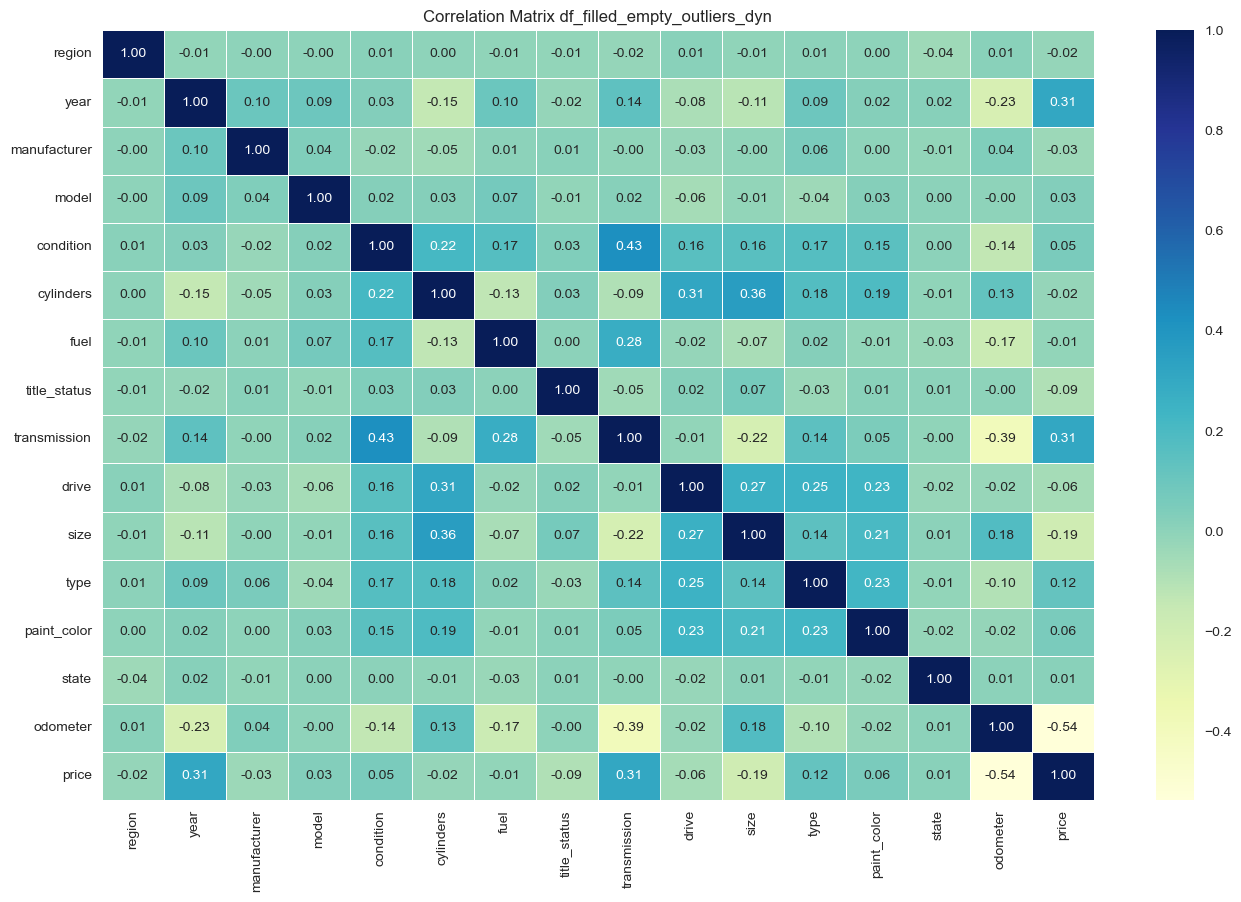

In [117]:
# Select numerical columns in df_filled_empty_outliers_dyn
df_temp_numeric = df_filled_empty_outliers_dyn[["region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state", "odometer", "price"]]

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu", 
            annot=True, 
            annot_kws={"size": 10})
plt.title('Correlation Matrix df_filled_empty_outliers_dyn')
plt.show()

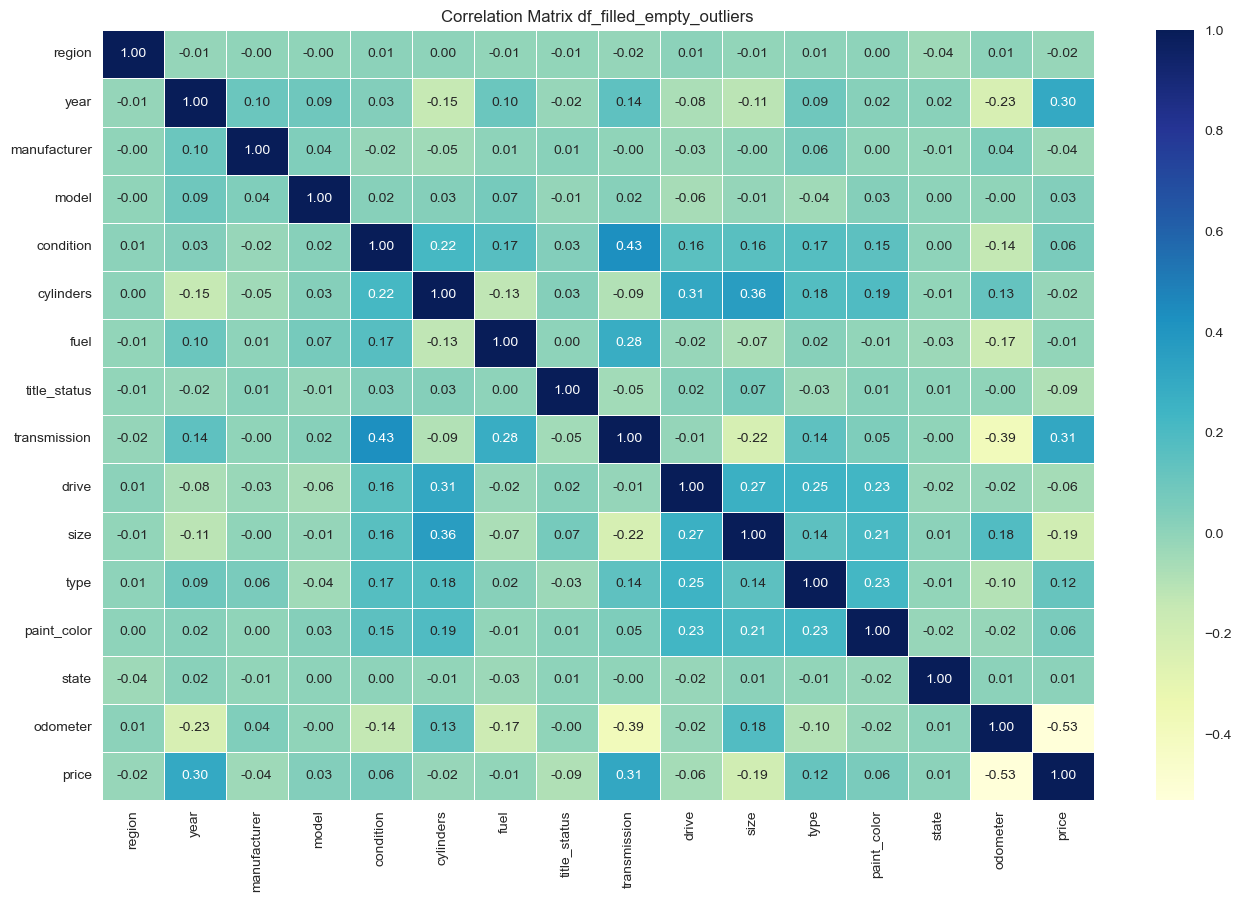

In [118]:
# Select numerical columns in df_filled_empty_outliers
df_temp_numeric = df_filled_empty_outliers[["region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state", "odometer", "price"]]

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu", 
            annot=True, 
            annot_kws={"size": 10})
plt.title('Correlation Matrix df_filled_empty_outliers')
plt.show()

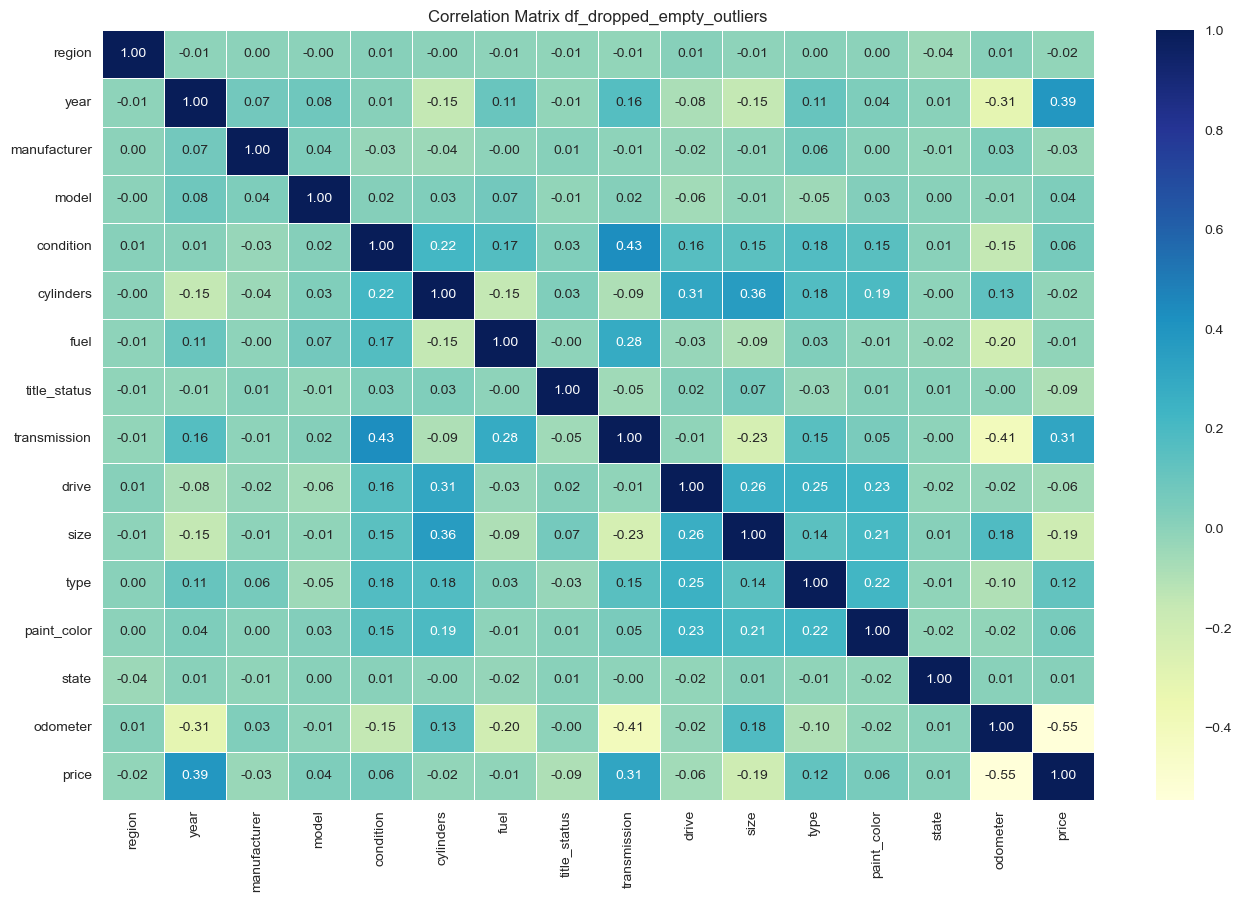

In [119]:
# Select numerical columns in df_filled_empty_outliers
df_temp_numeric = df_dropped_empty_outliers[["region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state", "odometer", "price"]]

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu", 
            annot=True, 
            annot_kws={"size": 10})
plt.title('Correlation Matrix df_dropped_empty_outliers')
plt.show()

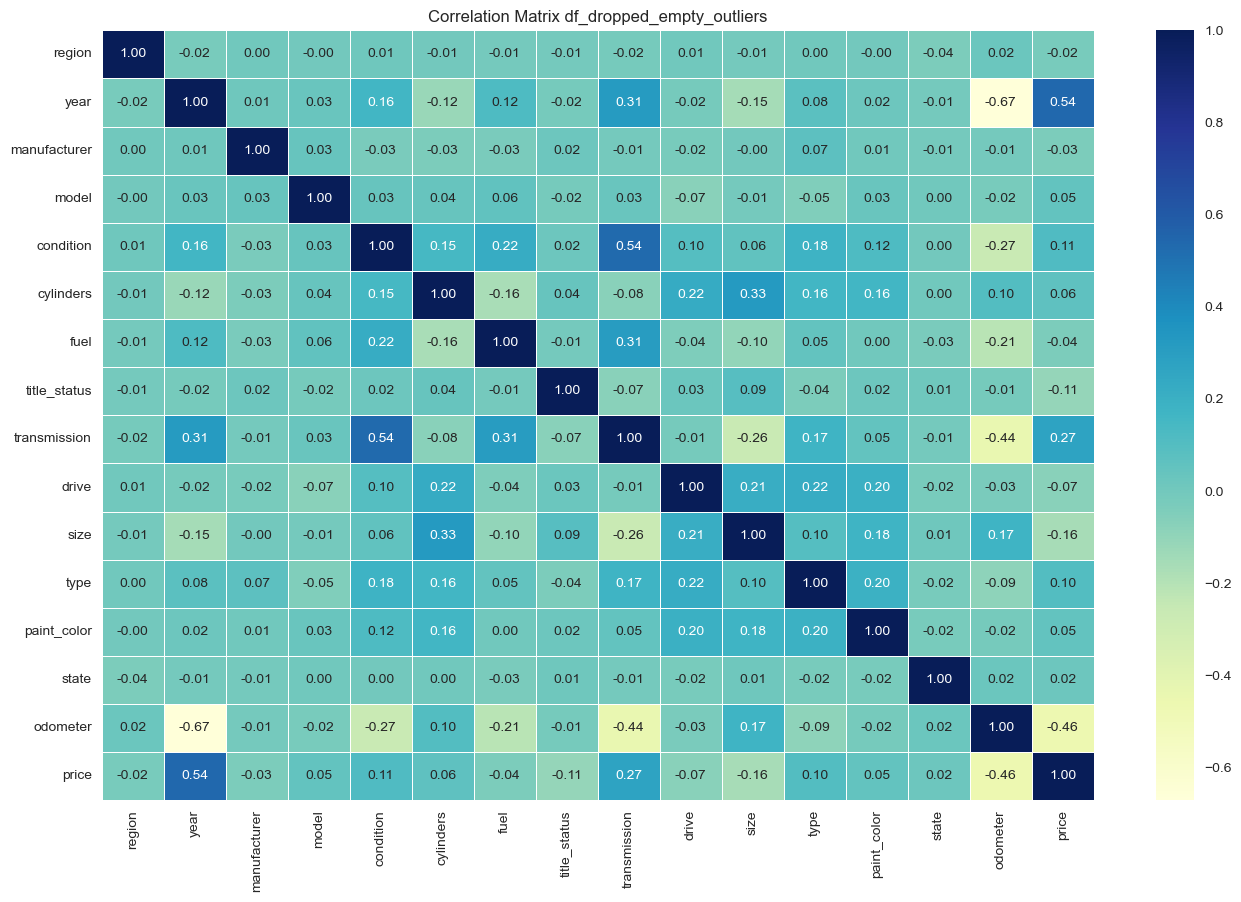

In [120]:
# Select numerical columns in df_filled_empty_outliers
df_temp_numeric = df_2010_filtered[["region", "year", "manufacturer", "model", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state", "odometer", "price"]]

# Compute the correlation matrix
corr_matrix = df_temp_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, 
            linewidths=0.5, 
            fmt=".2f", 
            cmap="YlGnBu", 
            annot=True, 
            annot_kws={"size": 10})
plt.title('Correlation Matrix df_dropped_empty_outliers')
plt.show()

## Export Cleaned Datasets

In [121]:
df_dropped_empty_outliers.to_csv('df_dropped_empty_outliers.csv', index=False)
df_filled_empty_outliers.to_csv('df_filled_empty_outliers.csv', index=False)
# df_filled_empty_outliers_dyn.to_csv('output.csv', index=False)
df_filled_empty_outliers_dyn1.to_csv('df_filled_empty_outliers_dyn.csv', index=False)

df_2010_filtered.to_csv('df_2010_filtered.csv', index=False)